<a href="https://colab.research.google.com/github/shumshersubashgautam/AILAB/blob/main/Lab_1_BIM_Search_Practical_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DFS:


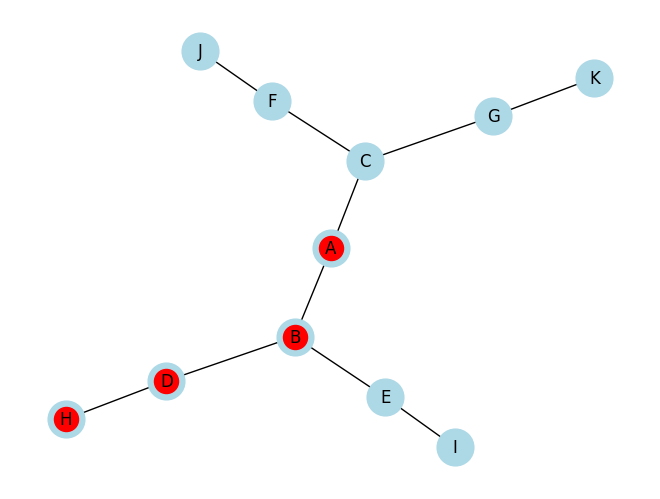

BFS:


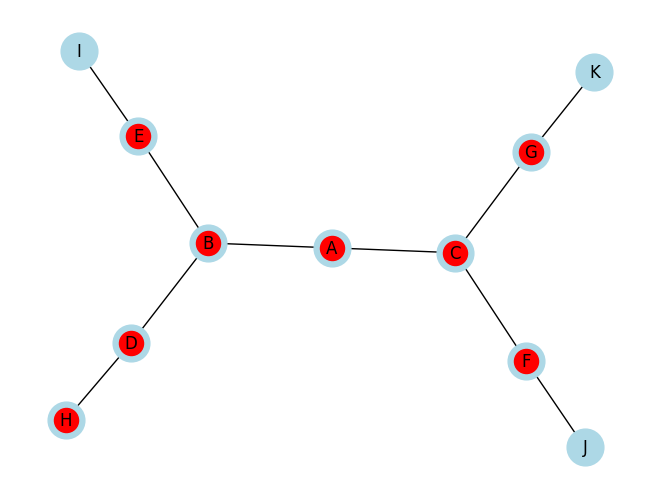

DLS (limit=3):


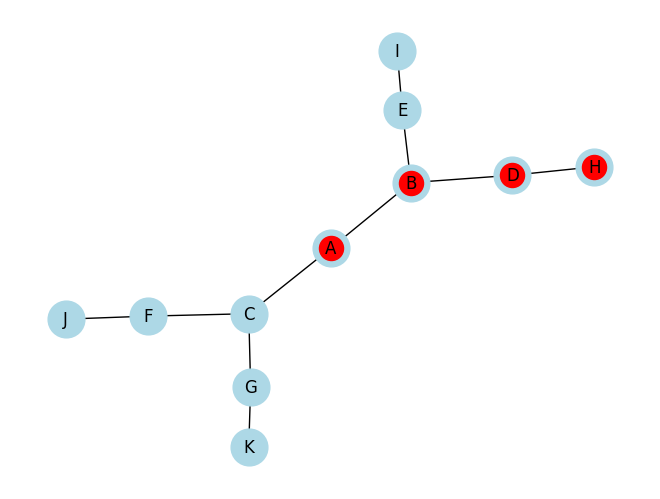

IDS (max_depth=5):


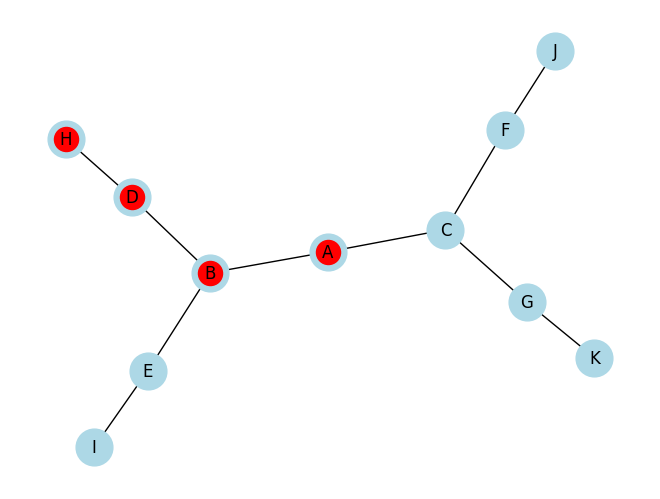

Bidirectional Search:


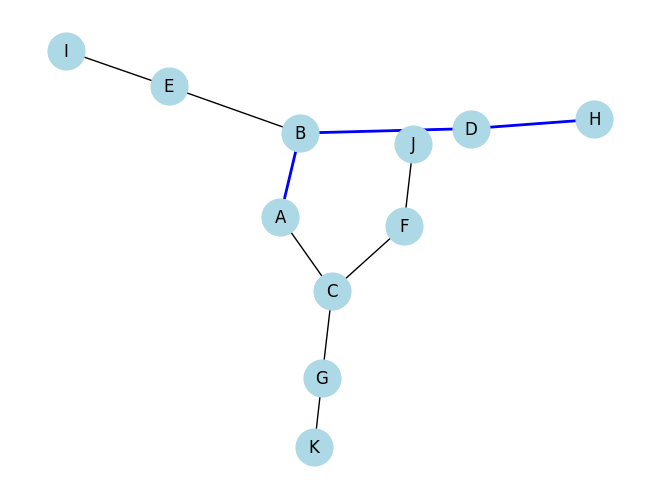

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph (city connections)
edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
    ('C', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'J'), ('G', 'K')
]
G.add_edges_from(edges)

# Function to draw the graph
def draw_graph(G, visited=None, path=None):
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    if visited:
        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    if path:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='blue', width=2)
    plt.show()

# Depth First Search (DFS)
def dfs(G, start, goal):
    stack = [start]
    visited = []
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            stack.extend(reversed(list(G.neighbors(node))))
    return visited

# Breadth First Search (BFS)
def bfs(G, start, goal):
    queue = [start]
    visited = []
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            queue.extend(G.neighbors(node))
    return visited

# Depth Limited Search (DLS)
def dls(G, start, goal, limit):
    stack = [(start, 0)]
    visited = []
    while stack:
        node, depth = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            if depth < limit:
                stack.extend((neighbor, depth + 1) for neighbor in reversed(list(G.neighbors(node))))
    return visited

# Iterative Deepening Search (IDS)
def ids(G, start, goal, max_depth):
    for depth in range(max_depth):
        visited = dls(G, start, goal, depth)
        if goal in visited:
            return visited
    return []

# Bidirectional Search
def bidirectional_search(G, start, goal):
    if start == goal:
        return [start]

    from_start = {start: None}
    from_goal = {goal: None}

    start_queue = [start]
    goal_queue = [goal]

    while start_queue and goal_queue:
        node = start_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_start:
                from_start[neighbor] = node
                start_queue.append(neighbor)
                if neighbor in from_goal:
                    return construct_path(from_start, from_goal, neighbor)

        node = goal_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_goal:
                from_goal[neighbor] = node
                goal_queue.append(neighbor)
                if neighbor in from_start:
                    return construct_path(from_start, from_goal, neighbor)

    return []

def construct_path(from_start, from_goal, meet_node):
    path = [meet_node]
    node = meet_node
    while from_start[node] is not None:
        path.append(from_start[node])
        node = from_start[node]
    path.reverse()
    node = meet_node
    while from_goal[node] is not None:
        node = from_goal[node]
        path.append(node)
    return path

# Visualization example
start_node = 'A'
goal_node = 'H'

print("DFS:")
visited_nodes = dfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes)

print("BFS:")
visited_nodes = bfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes)

print("DLS (limit=3):")
visited_nodes = dls(G, start_node, goal_node, limit=3)
draw_graph(G, visited=visited_nodes)

print("IDS (max_depth=5):")
visited_nodes = ids(G, start_node, goal_node, max_depth=5)
draw_graph(G, visited=visited_nodes)

print("Bidirectional Search:")
path = bidirectional_search(G, start_node, goal_node)
draw_graph(G, path=path)


DFS:


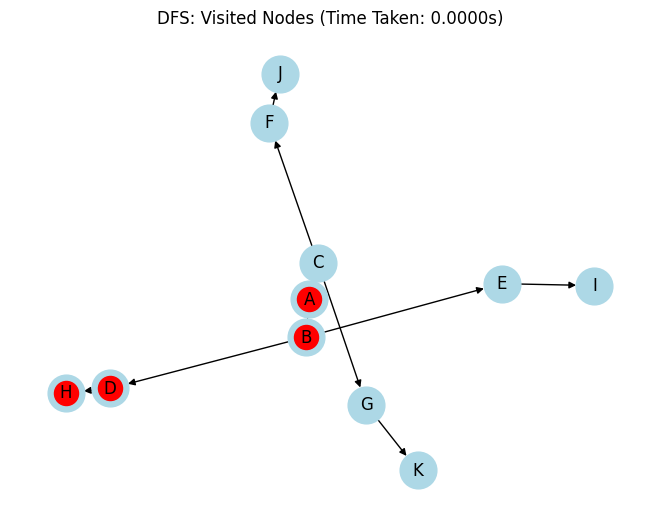

BFS:


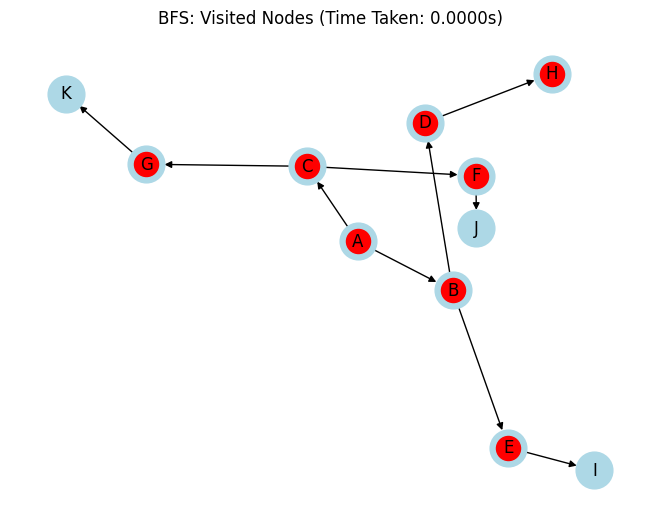

DLS (limit=3):


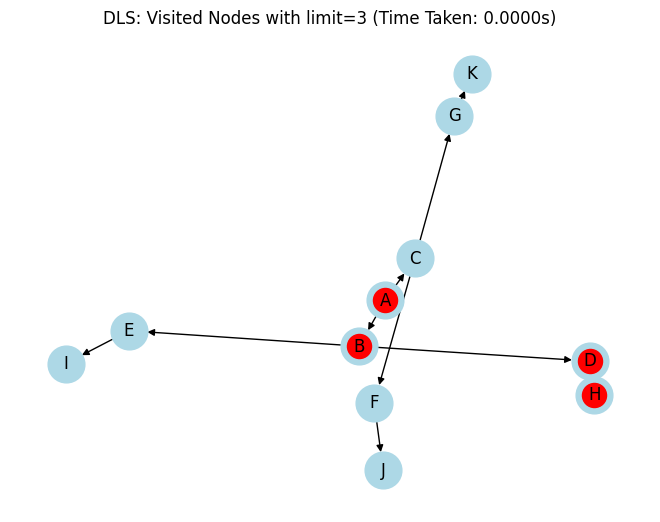

IDS (max_depth=5):


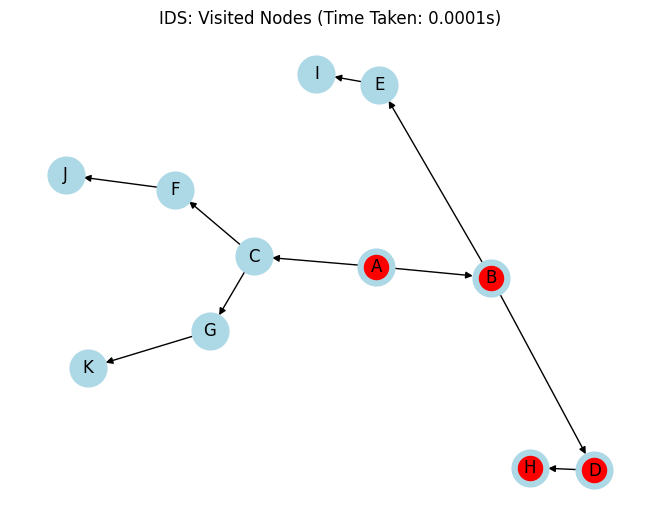

Bidirectional Search:


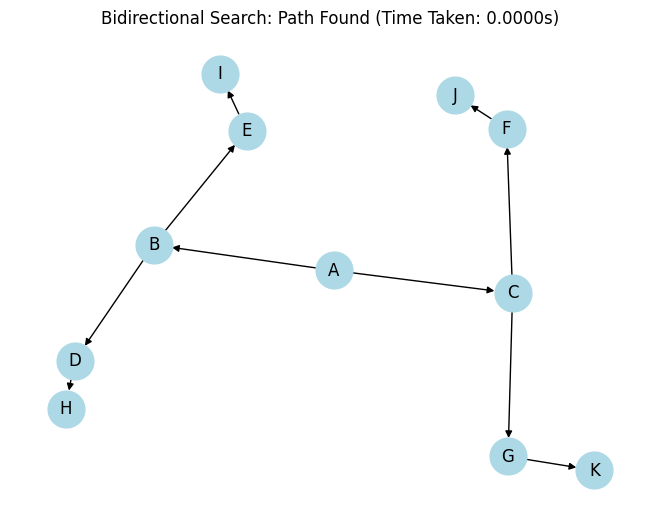

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Create a graph
G = nx.DiGraph()

# Add edges to the graph (city connections)
edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
    ('C', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'J'), ('G', 'K')
]
G.add_edges_from(edges)

# Function to draw the graph with search visualization
def draw_graph(G, visited=None, path=None, title=""):
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, arrows=True)
    if visited:
        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    if path:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='blue', width=2, arrows=True)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green')
    plt.title(title)
    plt.show()

# Depth First Search (DFS)
def dfs(G, start, goal):
    stack = [start]
    visited = []
    start_time = time.time()
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            stack.extend(reversed(list(G.neighbors(node))))
    end_time = time.time()
    return visited, end_time - start_time

# Breadth First Search (BFS)
def bfs(G, start, goal):
    queue = [start]
    visited = []
    start_time = time.time()
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            queue.extend(G.neighbors(node))
    end_time = time.time()
    return visited, end_time - start_time

# Depth Limited Search (DLS)
def dls(G, start, goal, limit):
    stack = [(start, 0)]
    visited = []
    start_time = time.time()
    while stack:
        node, depth = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            if depth < limit:
                stack.extend((neighbor, depth + 1) for neighbor in reversed(list(G.neighbors(node))))
    end_time = time.time()
    return visited, end_time - start_time

# Iterative Deepening Search (IDS)
def ids(G, start, goal, max_depth):
    start_time = time.time()
    for depth in range(max_depth):
        visited = dls(G, start, goal, depth)[0]
        if goal in visited:
            end_time = time.time()
            return visited, end_time - start_time
    end_time = time.time()
    return [], end_time - start_time

# Bidirectional Search
def bidirectional_search(G, start, goal):
    if start == goal:
        return [start], 0

    from_start = {start: None}
    from_goal = {goal: None}

    start_queue = [start]
    goal_queue = [goal]

    start_time = time.time()
    while start_queue and goal_queue:
        node = start_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_start:
                from_start[neighbor] = node
                start_queue.append(neighbor)
                if neighbor in from_goal:
                    end_time = time.time()
                    return construct_path(from_start, from_goal, neighbor), end_time - start_time

        node = goal_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_goal:
                from_goal[neighbor] = node
                goal_queue.append(neighbor)
                if neighbor in from_start:
                    end_time = time.time()
                    return construct_path(from_start, from_goal, neighbor), end_time - start_time

    end_time = time.time()
    return [], end_time - start_time

def construct_path(from_start, from_goal, meet_node):
    path = [meet_node]
    node = meet_node
    while from_start[node] is not None:
        path.append(from_start[node])
        node = from_start[node]
    path.reverse()
    node = meet_node
    while from_goal[node] is not None:
        node = from_goal[node]
        path.append(node)
    return path

# Visualization example
start_node = 'A'
goal_node = 'H'

print("DFS:")
visited_nodes, time_taken = dfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes, title=f"DFS: Visited Nodes (Time Taken: {time_taken:.4f}s)")

print("BFS:")
visited_nodes, time_taken = bfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes, title=f"BFS: Visited Nodes (Time Taken: {time_taken:.4f}s)")

print("DLS (limit=3):")
visited_nodes, time_taken = dls(G, start_node, goal_node, limit=3)
draw_graph(G, visited=visited_nodes, title=f"DLS: Visited Nodes with limit=3 (Time Taken: {time_taken:.4f}s)")

print("IDS (max_depth=5):")
visited_nodes, time_taken = ids(G, start_node, goal_node, max_depth=5)
draw_graph(G, visited=visited_nodes, title=f"IDS: Visited Nodes (Time Taken: {time_taken:.4f}s)")

print("Bidirectional Search:")
path, time_taken = bidirectional_search(G, start_node, goal_node)
draw_graph(G, path=path, title=f"Bidirectional Search: Path Found (Time Taken: {time_taken:.4f}s)")


DFS:


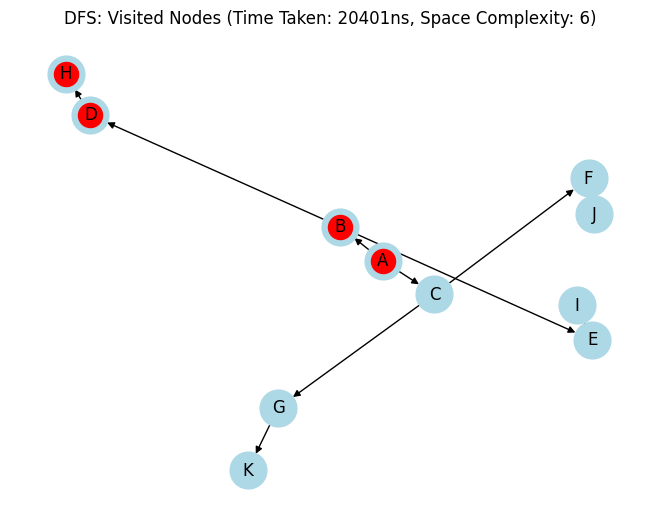

BFS:


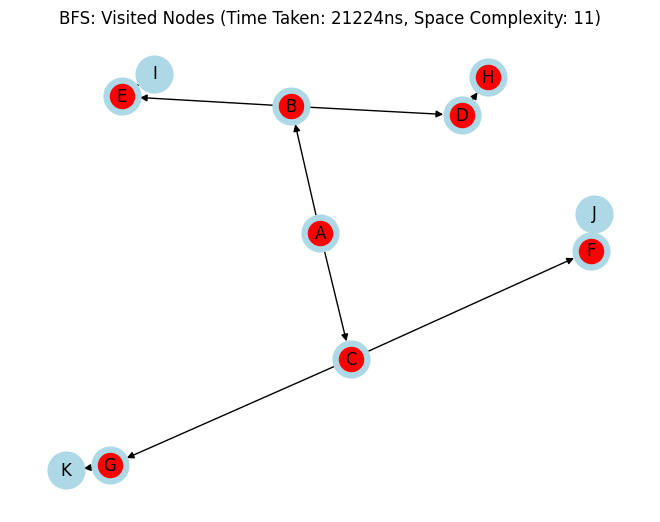

DLS (limit=3):


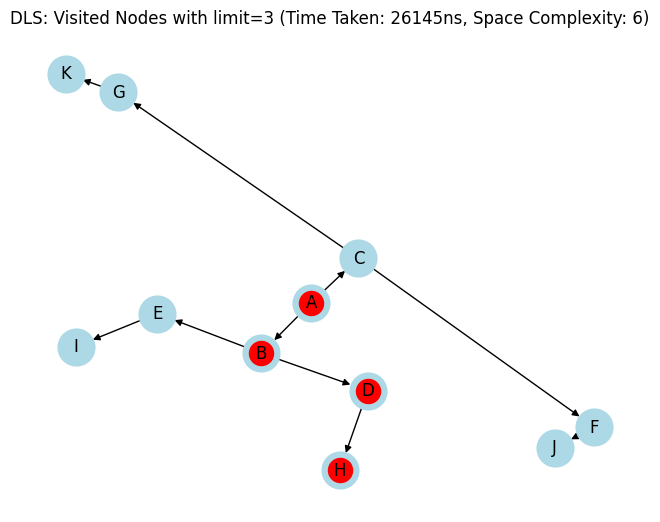

IDS (max_depth=5):


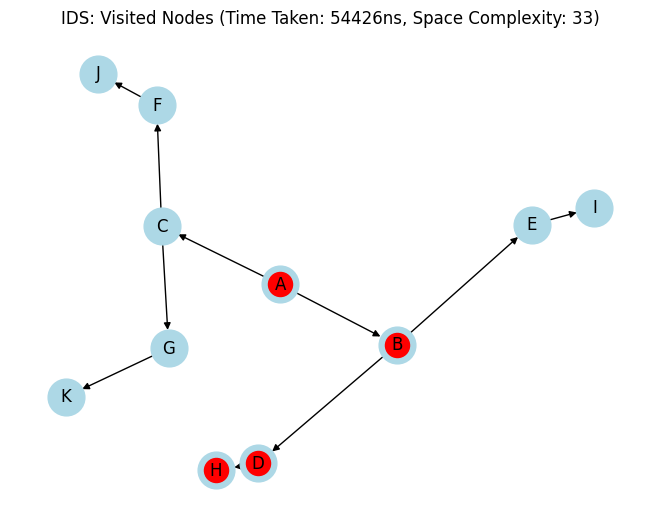

Bidirectional Search:


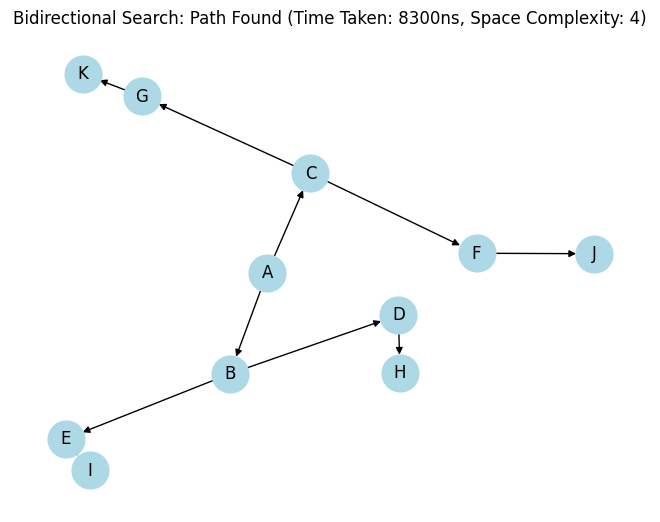

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Create a graph
G = nx.DiGraph()

# Add edges to the graph (city connections)
edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
    ('C', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'J'), ('G', 'K')
]
G.add_edges_from(edges)

# Function to draw the graph with search visualization
def draw_graph(G, visited=None, path=None, title=""):
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, arrows=True)
    if visited:
        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    if path:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='blue', width=2, arrows=True)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green')
    plt.title(title)
    plt.show()

# Depth First Search (DFS)
def dfs(G, start, goal):
    stack = [start]
    visited = []
    start_time = time.perf_counter_ns()
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            stack.extend(reversed(list(G.neighbors(node))))
    end_time = time.perf_counter_ns()
    return visited, end_time - start_time, len(stack) + len(visited)

# Breadth First Search (BFS)
def bfs(G, start, goal):
    queue = [start]
    visited = []
    start_time = time.perf_counter_ns()
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            queue.extend(G.neighbors(node))
    end_time = time.perf_counter_ns()
    return visited, end_time - start_time, len(queue) + len(visited)

# Depth Limited Search (DLS)
def dls(G, start, goal, limit):
    stack = [(start, 0)]
    visited = []
    start_time = time.perf_counter_ns()
    while stack:
        node, depth = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            if depth < limit:
                stack.extend((neighbor, depth + 1) for neighbor in reversed(list(G.neighbors(node))))
    end_time = time.perf_counter_ns()
    return visited, end_time - start_time, len(stack) + len(visited)

# Iterative Deepening Search (IDS)
def ids(G, start, goal, max_depth):
    start_time = time.perf_counter_ns()
    for depth in range(max_depth):
        visited, _, _ = dls(G, start, goal, depth)
        if goal in visited:
            end_time = time.perf_counter_ns()
            return visited, end_time - start_time, depth * len(G.nodes)
    end_time = time.perf_counter_ns()
    return [], end_time - start_time, max_depth * len(G.nodes)

# Bidirectional Search
def bidirectional_search(G, start, goal):
    if start == goal:
        return [start], 0, 1

    from_start = {start: None}
    from_goal = {goal: None}

    start_queue = [start]
    goal_queue = [goal]

    start_time = time.perf_counter_ns()
    while start_queue and goal_queue:
        node = start_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_start:
                from_start[neighbor] = node
                start_queue.append(neighbor)
                if neighbor in from_goal:
                    end_time = time.perf_counter_ns()
                    return construct_path(from_start, from_goal, neighbor), end_time - start_time, len(from_start) + len(from_goal)

        node = goal_queue.pop(0)
        for neighbor in G.neighbors(node):
            if neighbor not in from_goal:
                from_goal[neighbor] = node
                goal_queue.append(neighbor)
                if neighbor in from_start:
                    end_time = time.perf_counter_ns()
                    return construct_path(from_start, from_goal, neighbor), end_time - start_time, len(from_start) + len(from_goal)

    end_time = time.perf_counter_ns()
    return [], end_time - start_time, len(from_start) + len(from_goal)

def construct_path(from_start, from_goal, meet_node):
    path = [meet_node]
    node = meet_node
    while from_start[node] is not None:
        path.append(from_start[node])
        node = from_start[node]
    path.reverse()
    node = meet_node
    while from_goal[node] is not None:
        node = from_goal[node]
        path.append(node)
    return path

# Visualization example
start_node = 'A'
goal_node = 'H'

print("DFS:")
visited_nodes, time_taken, space_complexity = dfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes, title=f"DFS: Visited Nodes (Time Taken: {time_taken}ns, Space Complexity: {space_complexity})")

print("BFS:")
visited_nodes, time_taken, space_complexity = bfs(G, start_node, goal_node)
draw_graph(G, visited=visited_nodes, title=f"BFS: Visited Nodes (Time Taken: {time_taken}ns, Space Complexity: {space_complexity})")

print("DLS (limit=3):")
visited_nodes, time_taken, space_complexity = dls(G, start_node, goal_node, limit=3)
draw_graph(G, visited=visited_nodes, title=f"DLS: Visited Nodes with limit=3 (Time Taken: {time_taken}ns, Space Complexity: {space_complexity})")

print("IDS (max_depth=5):")
visited_nodes, time_taken, space_complexity = ids(G, start_node, goal_node, max_depth=5)
draw_graph(G, visited=visited_nodes, title=f"IDS: Visited Nodes (Time Taken: {time_taken}ns, Space Complexity: {space_complexity})")

print("Bidirectional Search:")
path, time_taken, space_complexity = bidirectional_search(G, start_node, goal_node)
draw_graph(G, path=path, title=f"Bidirectional Search: Path Found (Time Taken: {time_taken}ns, Space Complexity: {space_complexity})")


# **Game playing through BFS & DFS**
# **X- DFS**
#**O- BFS**


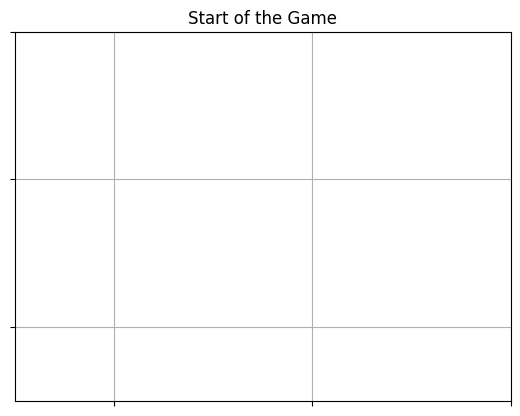

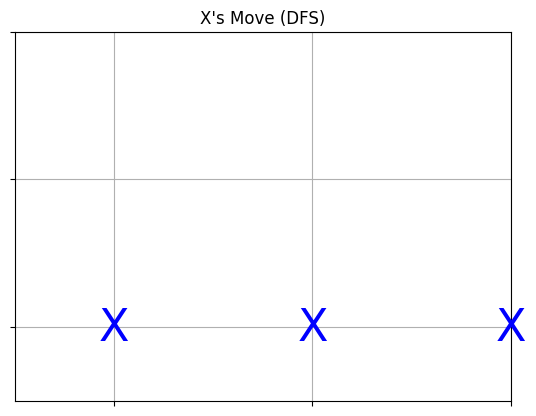

X wins!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from queue import Queue

# Function to check for a win condition
def check_win(board, player):
    for row in board:
        if all(s == player for s in row):
            return True
    for col in range(len(board)):
        if all(row[col] == player for row in board):
            return True
    if all(board[i][i] == player for i in range(len(board))) or all(board[i][len(board)-1-i] == player for i in range(len(board))):
        return True
    return False

# Function to draw the Tic-Tac-Toe board
def draw_board(board, title=""):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0.5, 3.5, 1))
    ax.set_yticks(np.arange(0.5, 3.5, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] != ' ':
                ax.text(j + 0.5, 2.5 - i, board[i][j], ha='center', va='center', fontsize=32, color='blue' if board[i][j] == 'X' else 'red')
    plt.title(title)
    plt.show()

# Function to get available moves
def get_available_moves(board):
    moves = []
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == ' ':
                moves.append((i, j))
    return moves

# DFS move for 'X'
def dfs_move(board):
    stack = [board]
    while stack:
        current_board = stack.pop()
        for move in get_available_moves(current_board):
            new_board = [row[:] for row in current_board]
            new_board[move[0]][move[1]] = 'X'
            if check_win(new_board, 'X'):
                return new_board
            stack.append(new_board)
    return board

# BFS move for 'O'
def bfs_move(board):
    queue = Queue()
    queue.put(board)
    while not queue.empty():
        current_board = queue.get()
        for move in get_available_moves(current_board):
            new_board = [row[:] for row in current_board]
            new_board[move[0]][move[1]] = 'O'
            if check_win(new_board, 'O'):
                return new_board
            queue.put(new_board)
    return board

# Function to play the game
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    draw_board(board, title="Start of the Game")

    for _ in range(5):
        board = dfs_move(board)
        draw_board(board, title="X's Move (DFS)")
        if check_win(board, 'X'):
            print("X wins!")
            return
        if ' ' not in sum(board, []):
            print("It's a draw!")
            return

        board = bfs_move(board)
        draw_board(board, title="O's Move (BFS)")
        if check_win(board, 'O'):
            print("O wins!")
            return
        if ' ' not in sum(board, []):
            print("It's a draw!")
            return

play_game()


# **X moves BDS**
# **O moves on IDS**

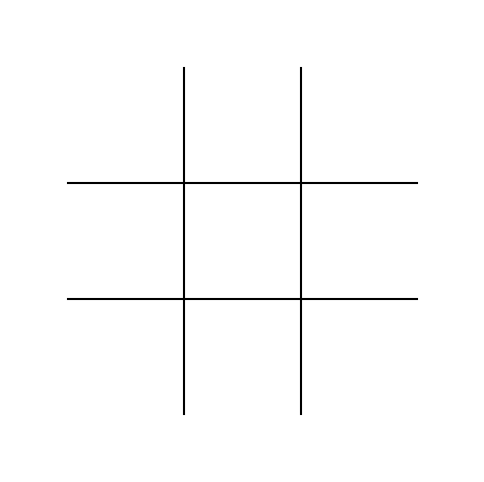

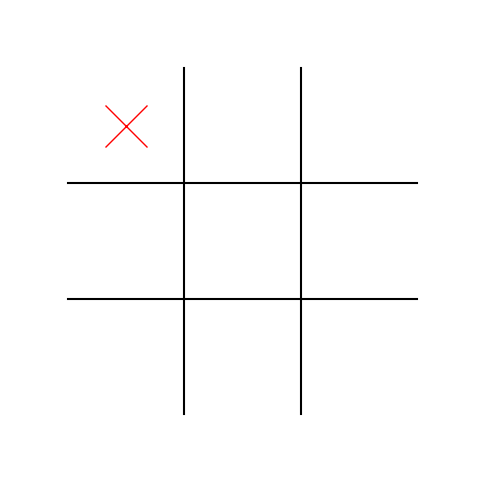

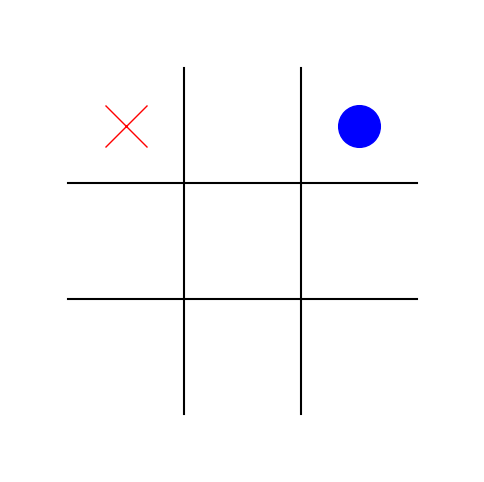

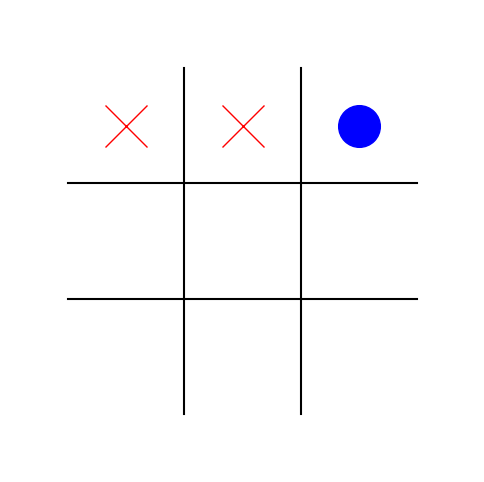

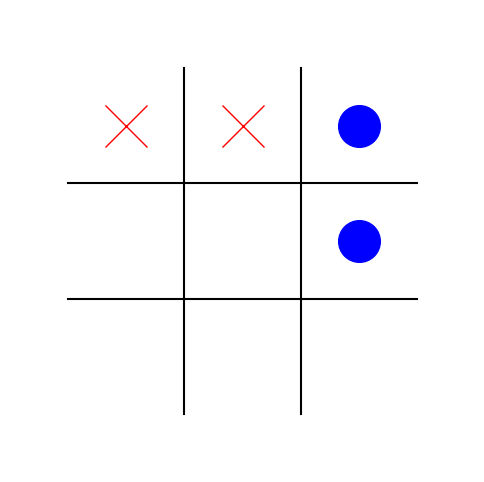

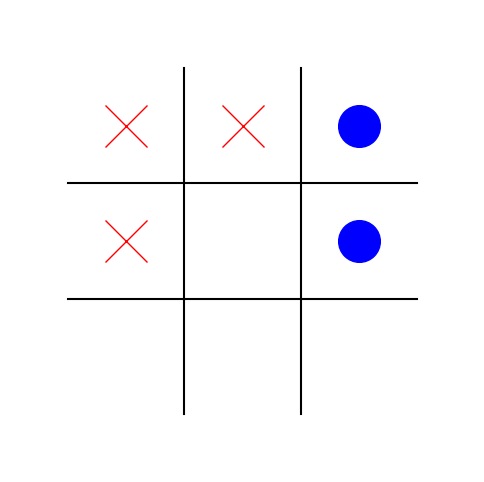

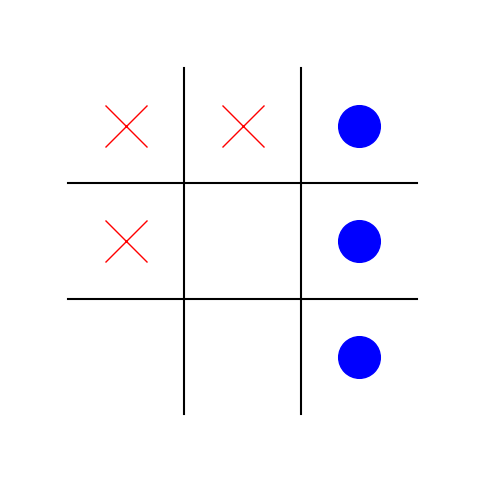

Player O wins!


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Bidirectional Depth Search (BDS)
def bidirectional_depth_search(board, player):
    moves = available_moves(board)
    for depth in range(1, 10):
        for move in moves:
            if dfs(board, player, move, depth):
                return move
    return None

def dfs(board, player, move, depth):
    if depth == 0 or check_win(board, player):
        return check_win(board, player)

    i, j = move
    board[i][j] = player
    opponent = 'O' if player == 'X' else 'X'
    for next_move in available_moves(board):
        if dfs(board, opponent, next_move, depth - 1):
            board[i][j] = ' '
            return False
    board[i][j] = ' '
    return True

# Function to perform Iterative Deepening Search (IDS)
def iterative_deepening_search(board, player):
    for depth in range(1, 10):
        result = ids(board, player, depth)
        if result is not None:
            return result
    return None

def ids(board, player, depth):
    stack = [(board, player, depth)]
    visited = set()

    while stack:
        current_board, current_player, current_depth = stack.pop()
        if check_win(current_board, current_player):
            return None

        if current_depth == 0:
            continue

        for move in available_moves(current_board):
            new_board = [row[:] for row in current_board]
            i, j = move
            new_board[i][j] = current_player

            board_tuple = tuple(tuple(row) for row in new_board)
            if board_tuple in visited:
                continue

            visited.add(board_tuple)

            if current_player == player:
                if check_win(new_board, player):
                    return move
            stack.append((new_board, 'O' if current_player == 'X' else 'X', current_depth - 1))

    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = bidirectional_depth_search(board, current_player)
        else:
            move = iterative_deepening_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **X moves usesBDS**
# **O moves uses DFS**

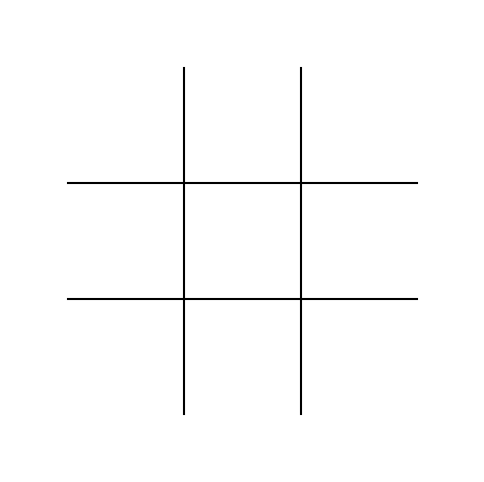

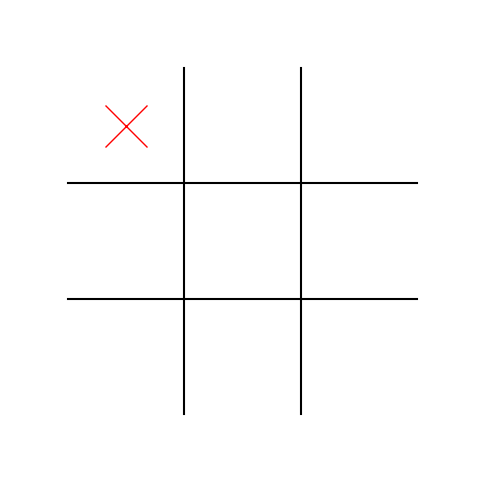

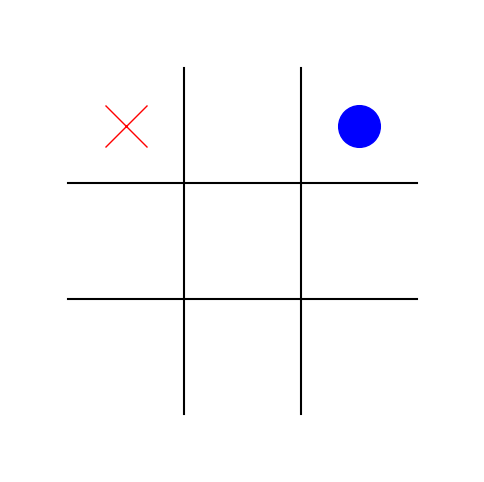

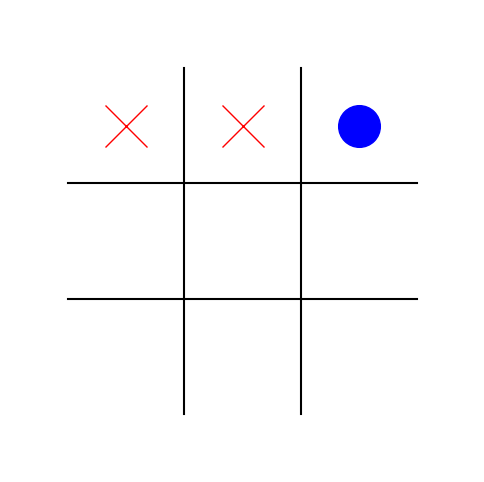

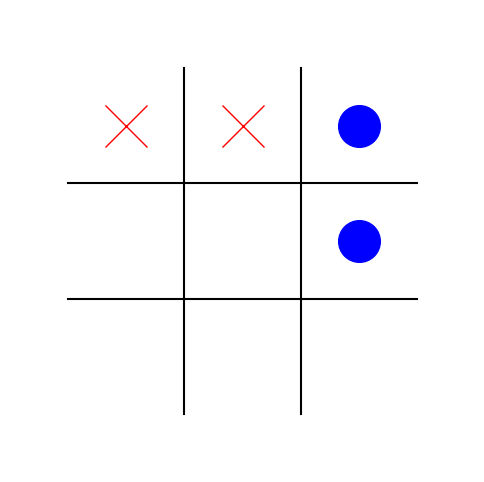

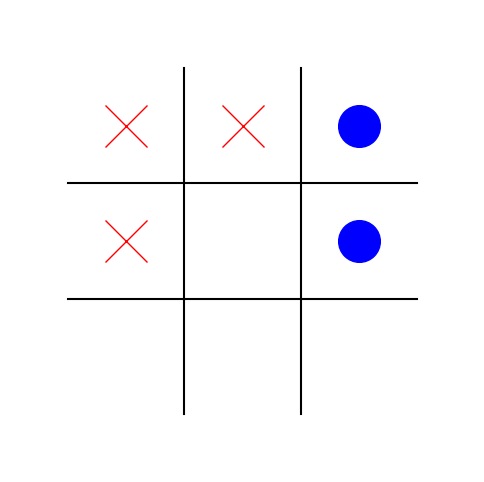

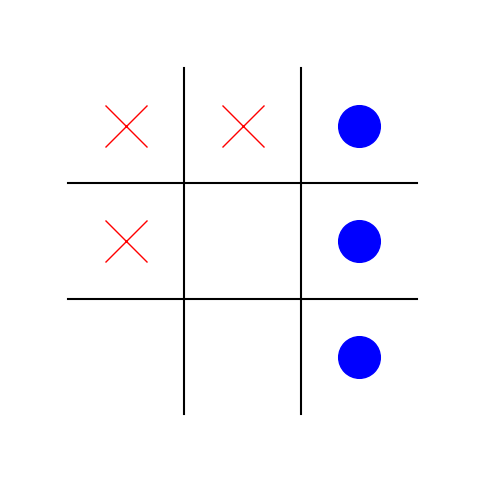

Player O wins!


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Bidirectional Depth Search (BDS)
def bidirectional_depth_search(board, player):
    moves = available_moves(board)
    for depth in range(1, 10):
        for move in moves:
            if dfs(board, player, move, depth):
                return move
    return None

def dfs(board, player, move, depth):
    if depth == 0 or check_win(board, player):
        return check_win(board, player)

    i, j = move
    board[i][j] = player
    opponent = 'O' if player == 'X' else 'X'
    for next_move in available_moves(board):
        if dfs(board, opponent, next_move, depth - 1):
            board[i][j] = ' '
            return False
    board[i][j] = ' '
    return True

# Function to perform Depth-First Search (DFS)
def depth_first_search(board, player):
    stack = [(board, player)]
    while stack:
        current_board, current_player = stack.pop()
        if check_win(current_board, current_player):
            return None

        for move in available_moves(current_board):
            new_board = [row[:] for row in current_board]
            i, j = move
            new_board[i][j] = current_player

            if check_win(new_board, current_player):
                return move
            stack.append((new_board, 'O' if current_player == 'X' else 'X'))

    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = bidirectional_depth_search(board, current_player)
        else:
            move = depth_first_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **X moves uses IDS**

# **O moves uses GBFS(Greedy Best Search)**

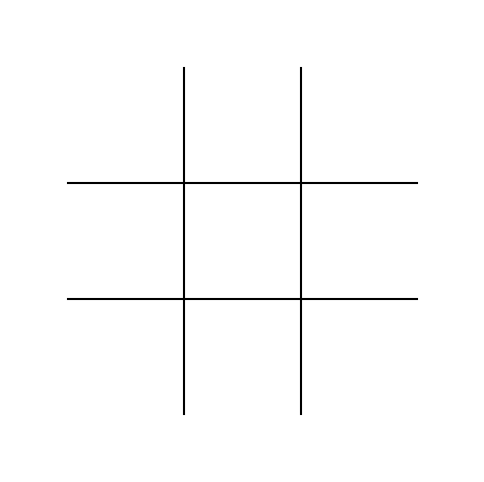

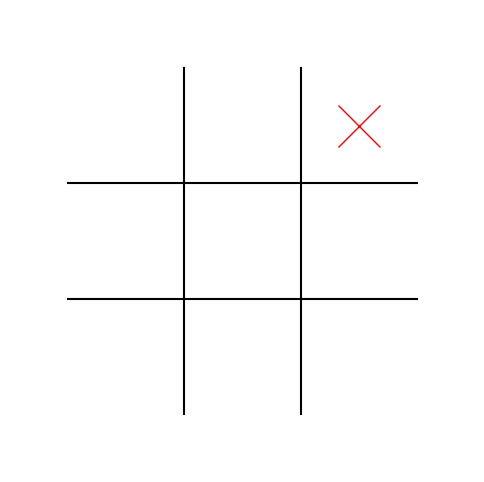

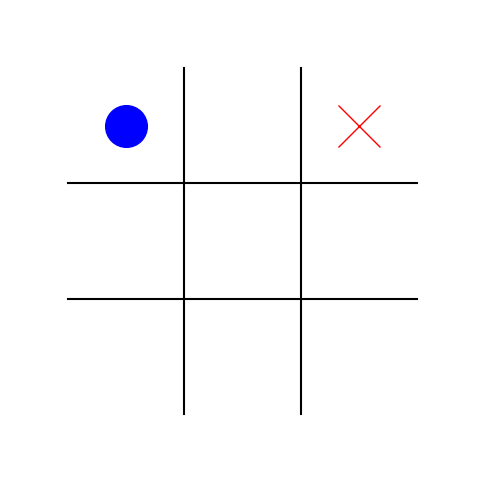

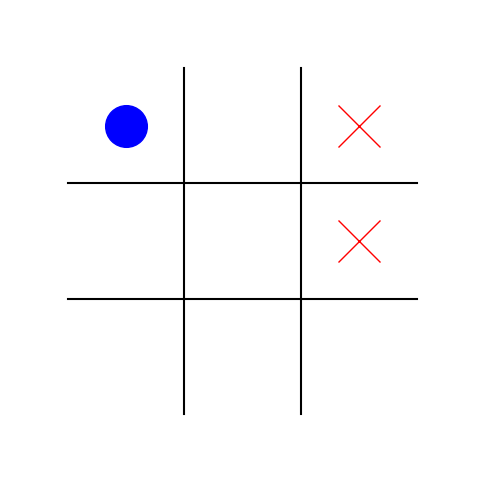

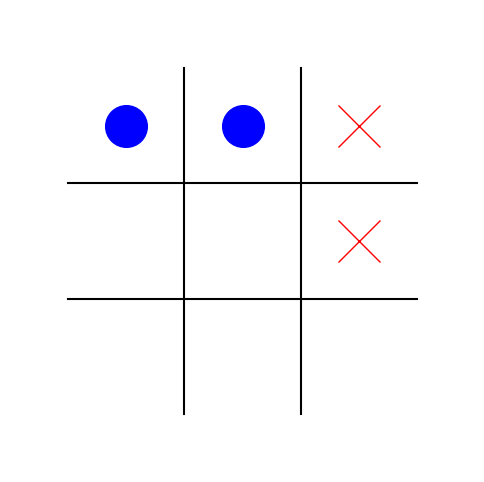

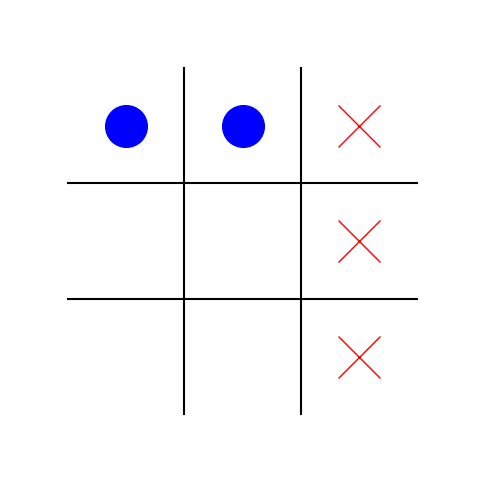

Player X wins!


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Iterative Deepening Search (IDS)
def iterative_deepening_search(board, player):
    for depth in range(1, 10):
        result = ids(board, player, depth)
        if result is not None:
            return result
    return None

def ids(board, player, depth):
    stack = [(board, player, depth)]
    visited = set()

    while stack:
        current_board, current_player, current_depth = stack.pop()
        if check_win(current_board, current_player):
            return None

        if current_depth == 0:
            continue

        for move in available_moves(current_board):
            new_board = [row[:] for row in current_board]
            i, j = move
            new_board[i][j] = current_player

            board_tuple = tuple(tuple(row) for row in new_board)
            if board_tuple in visited:
                continue

            visited.add(board_tuple)

            if current_player == player:
                if check_win(new_board, player):
                    return move
            stack.append((new_board, 'O' if current_player == 'X' else 'X', current_depth - 1))

    return None

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = iterative_deepening_search(board, current_player)
        else:
            move = greedy_best_first_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **X moves uses DFS**
# **O moves uses GBFS(Greedy Best Search)**

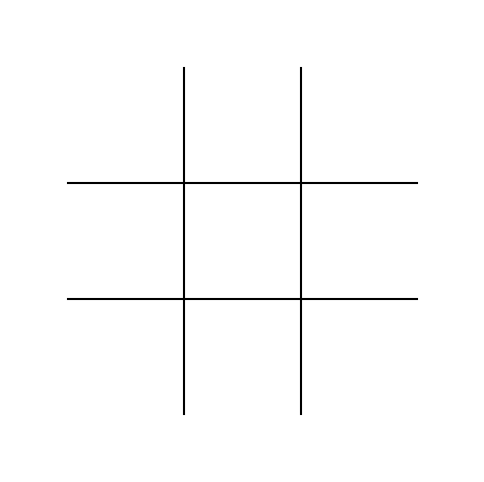

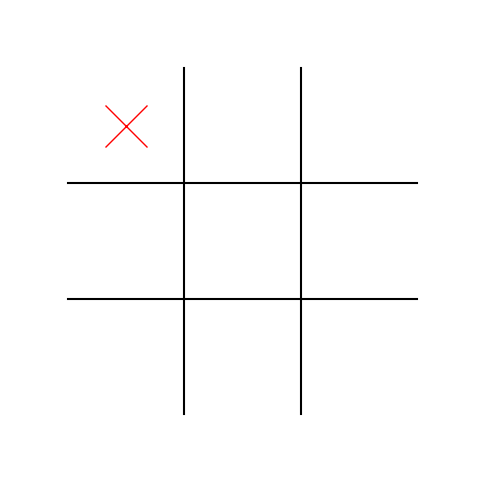

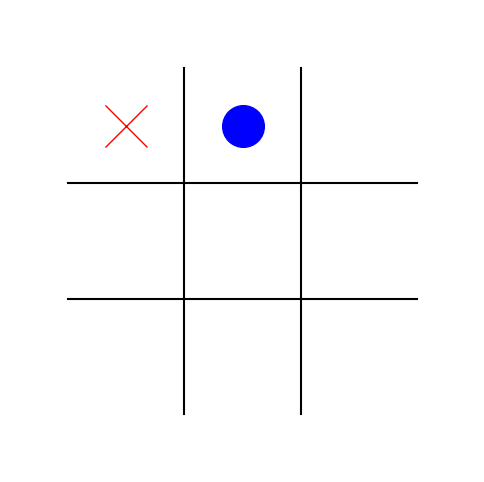

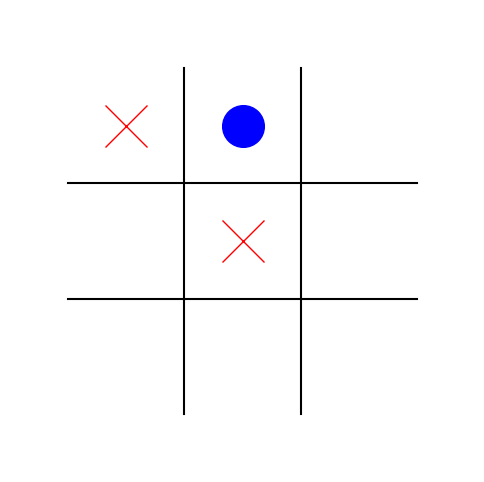

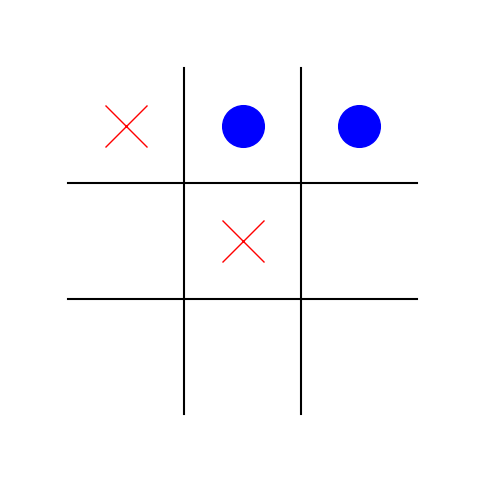

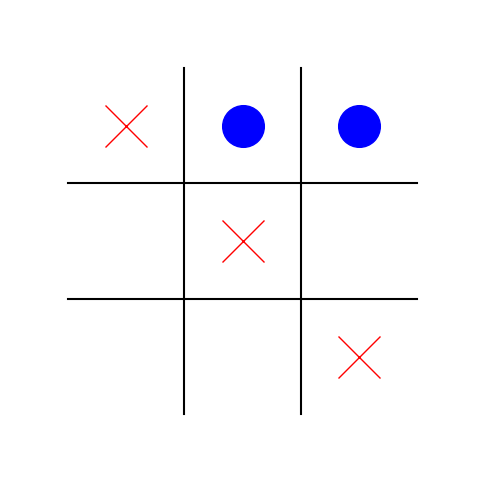

Player X wins!


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Depth-First Search (DFS)
def depth_first_search(board, player):
    stack = [(board, player)]
    while stack:
        current_board, current_player = stack.pop()
        if check_win(current_board, current_player):
            return None

        for move in available_moves(current_board):
            new_board = [row[:] for row in current_board]
            i, j = move
            new_board[i][j] = current_player

            if check_win(new_board, current_player):
                return move
            stack.append((new_board, 'O' if current_player == 'X' else 'X'))

    return None

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = depth_first_search(board, current_player)
        else:
            move = greedy_best_first_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **'X' uses Greedy Best First Search (GBFS) and 'O' uses Depth-First Search (DFS)**

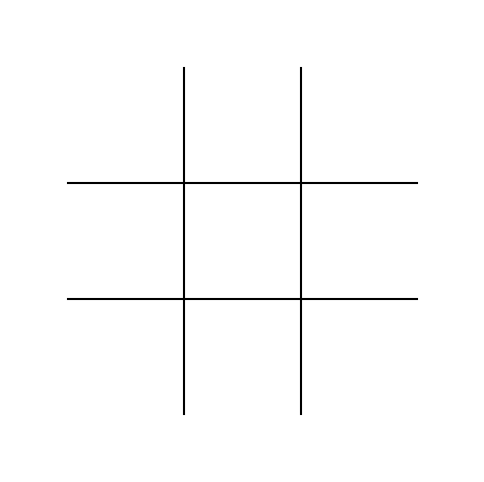

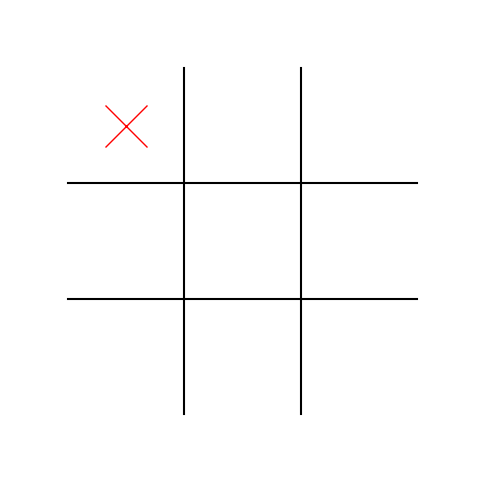

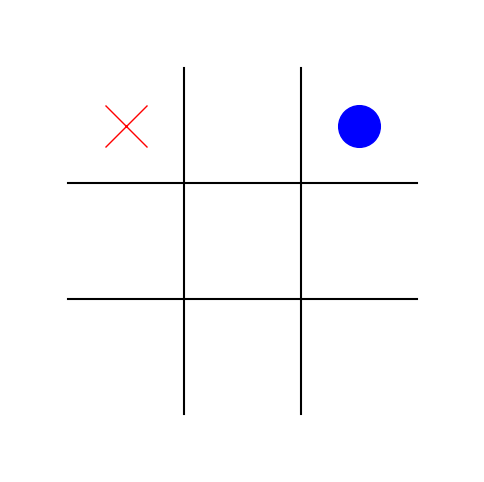

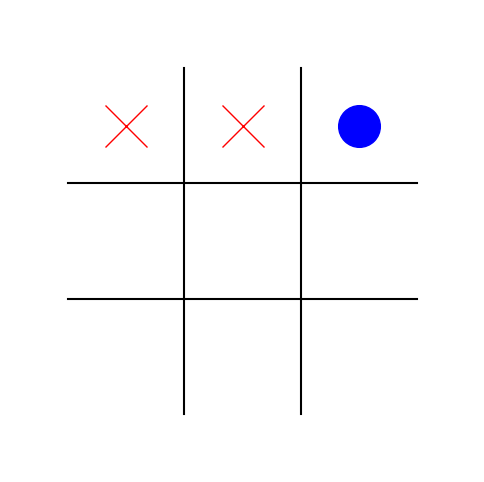

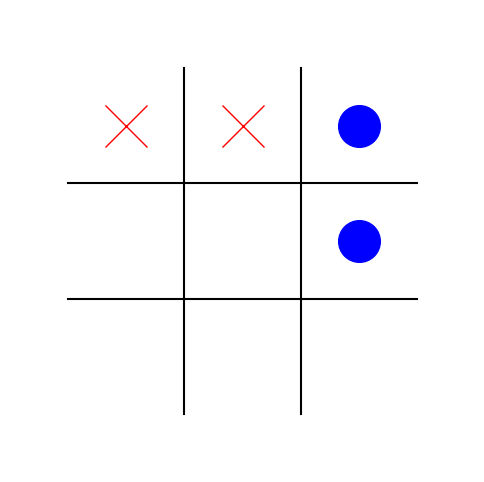

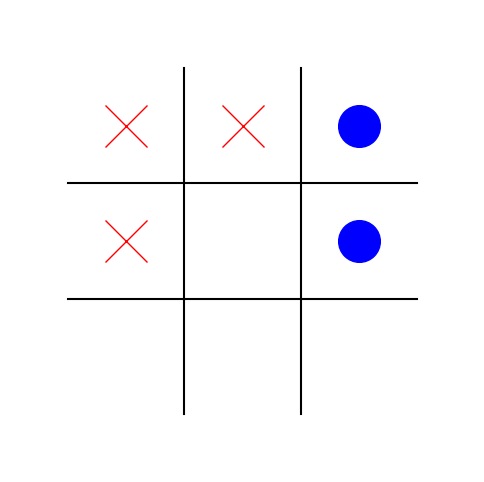

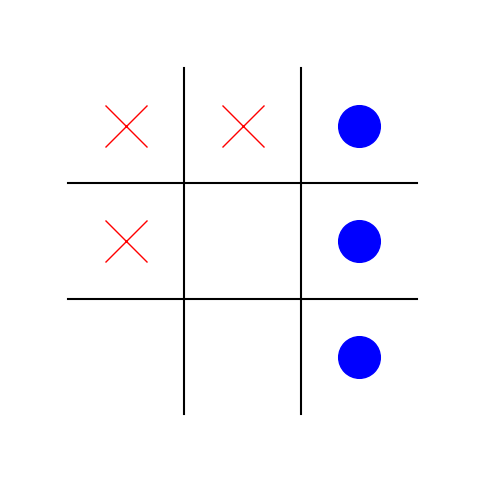

Player O wins!


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to perform Depth-First Search (DFS)
def depth_first_search(board, player):
    stack = [(board, player)]
    while stack:
        current_board, current_player = stack.pop()
        if check_win(current_board, current_player):
            return None

        for move in available_moves(current_board):
            new_board = [row[:] for row in current_board]
            i, j = move
            new_board[i][j] = current_player

            if check_win(new_board, current_player):
                return move
            stack.append((new_board, 'O' if current_player == 'X' else 'X'))

    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = greedy_best_first_search(board, current_player)
        else:
            move = depth_first_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


##X moves with Greedy Best depth search and O moves with A* Search Lets see who will win in this problem.

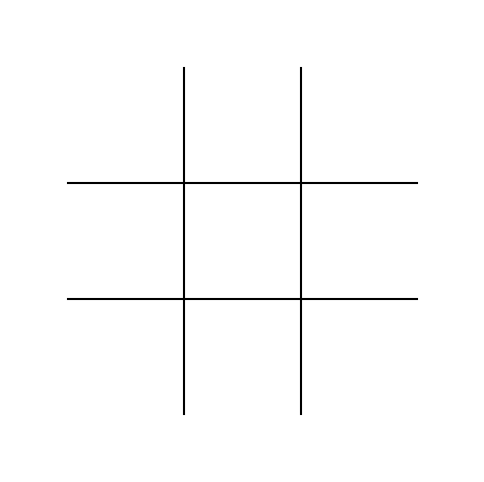

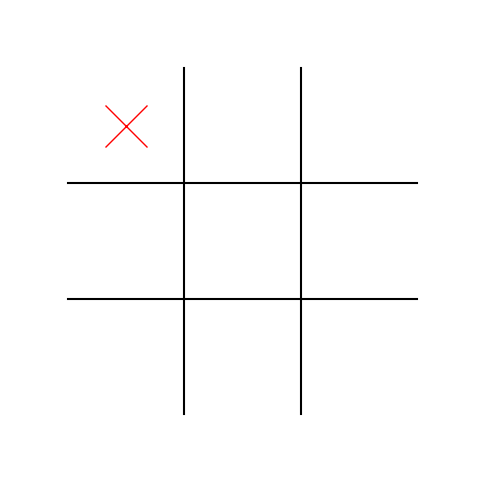

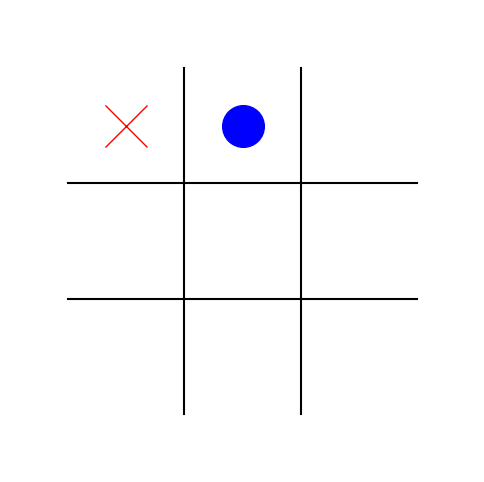

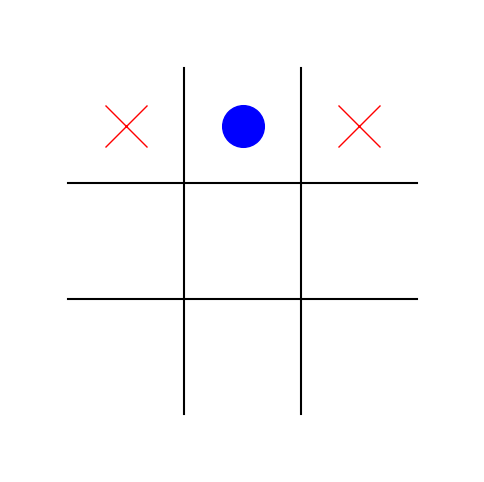

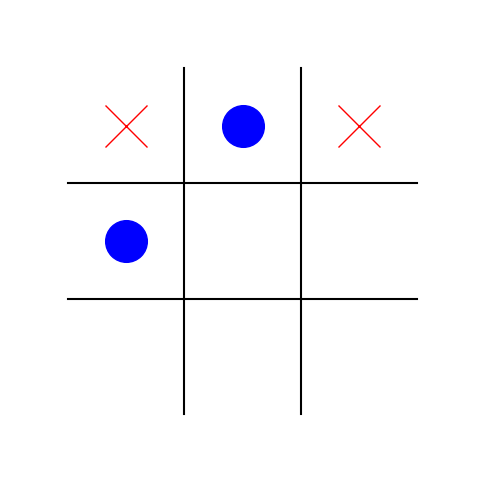

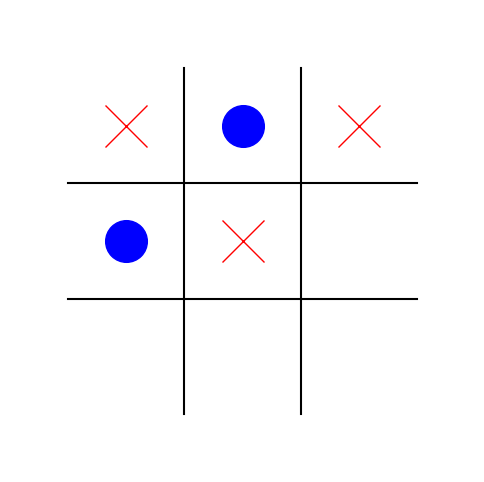

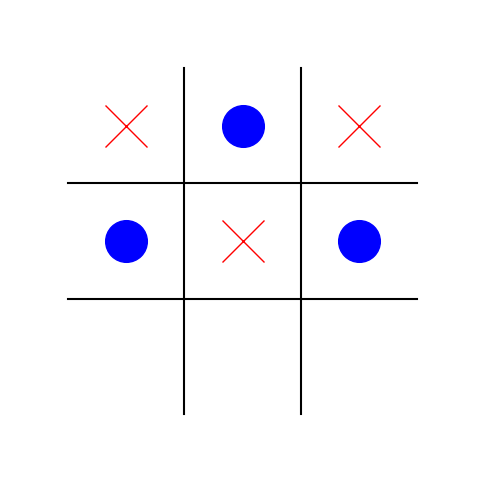

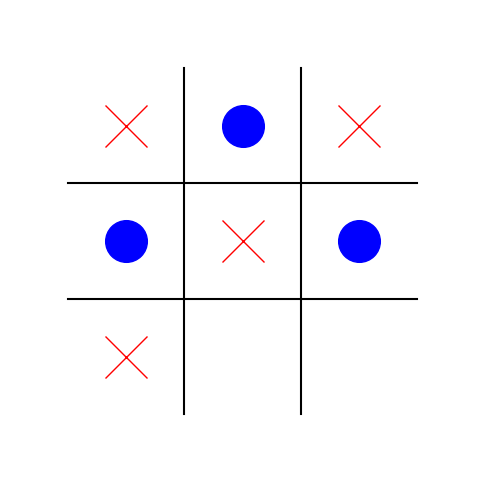

Player X wins!


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to perform A* Search
def a_star_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    def a_star_heuristic(board, player):
        if check_win(board, player):
            return 10
        if check_win(board, 'X' if player == 'O' else 'O'):
            return -10
        return 0

    for move in moves:
        i, j = move
        board[i][j] = player
        score = a_star_heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = greedy_best_first_search(board, current_player)
        else:
            move = a_star_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **A* Star Search**  

The A* search algorithm typically involves a heuristic to guide the search for the best move. For Tic-Tac-Toe, a simple heuristic could be based on the potential for winning, blocking an opponent's winning move, or making progress towards a winning line.

# A* Search for Tic-Tac-Toe
# Define the Board:
Represent the board as a list of lists or a single list.

**Heuristic Function:**

Simple heuristic: 1 point for each potential winning line.
A Search Algorithm:*

Generate possible moves.

Evaluate each move using the heuristic.

Choose the best move based on the evaluation.

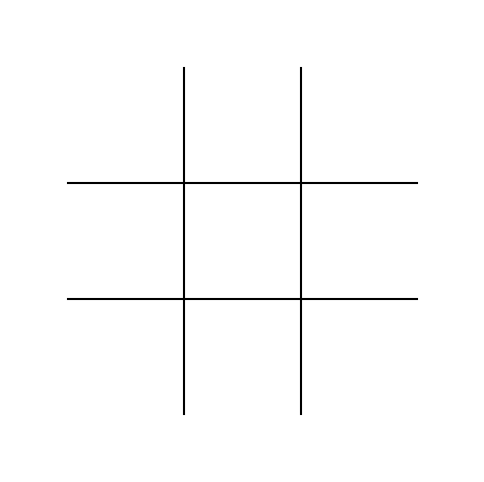

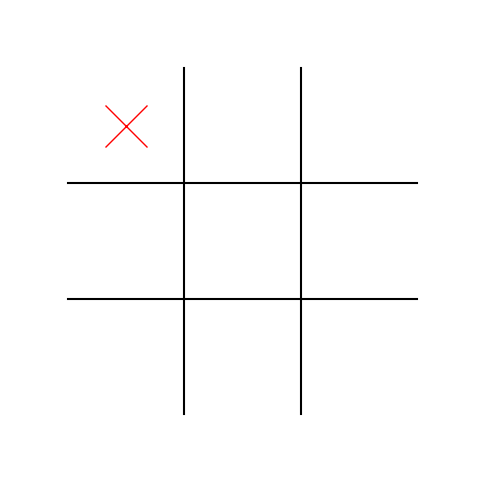

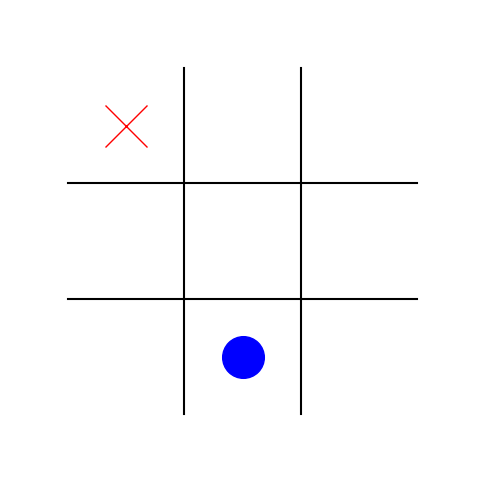

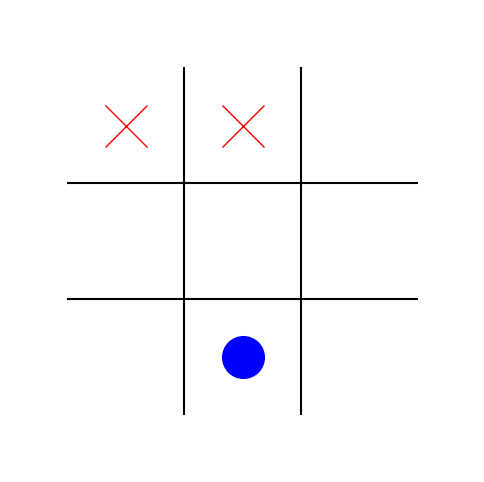

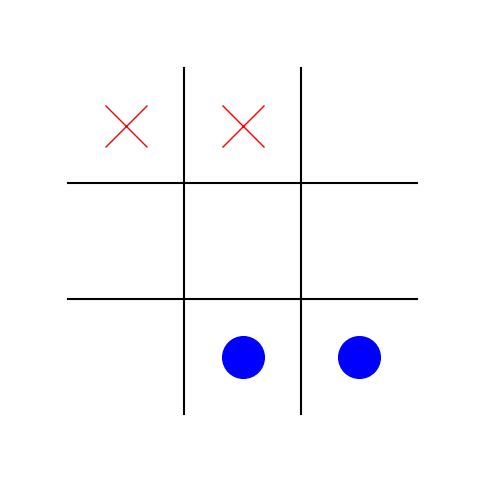

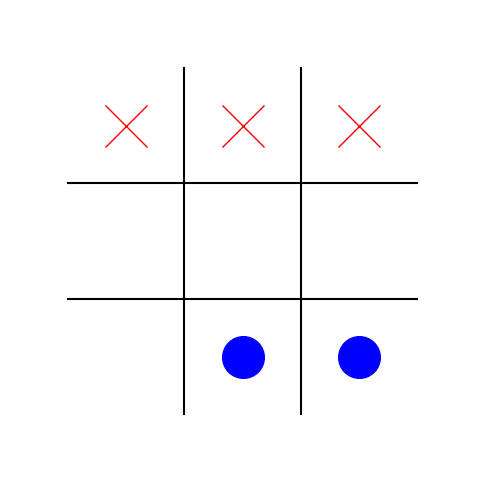

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# A* search function
def a_star_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            i, j = a_star_search(board, current_player)
        else:
            moves = available_moves(board)
            i, j = moves[np.random.choice(len(moves))]  # Random move for 'O'

        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **Explanation**

Plot Board Function:

# Visualizes the Tic-Tac-Toe board using matplotlib.
# **Check Win Function:**

Checks if a given player has won the game by evaluating all possible winning states.
# **Heuristic Function:**

Evaluates the board state. If the current player wins, it returns a high positive score. If the opponent wins, it returns a high negative score. Otherwise, it returns 0.
Available Moves Function:

Returns a list of all available moves on the board.
A Search Function:*

Generates possible moves, evaluates each move using the heuristic function, and selects the best move.
Play Game Function:

Simulates a game of Tic-Tac-Toe where
## 'X' uses the A* search algorithm  
## and 'O' makes random moves.
When you run the code, it will visualize each step of the Tic-Tac-Toe game, showing how the A* search algorithm selects moves and how the game progresses.

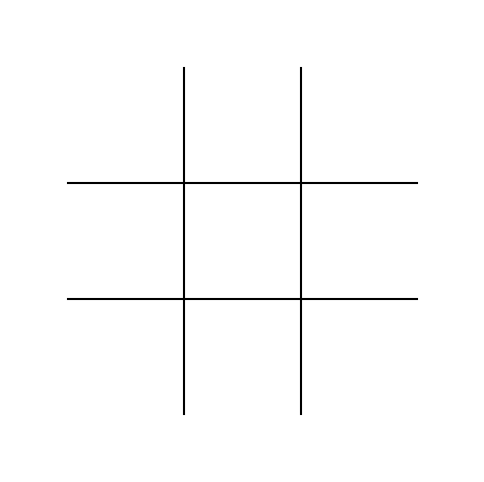

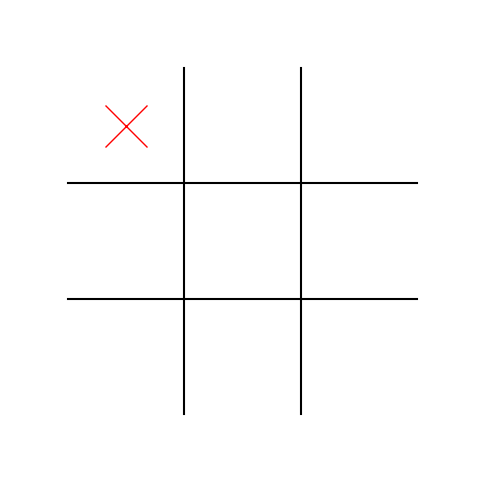

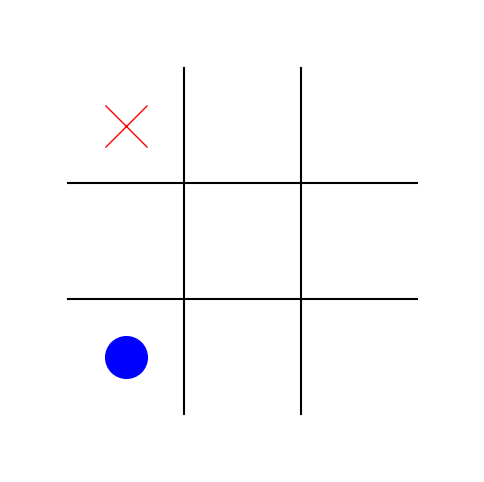

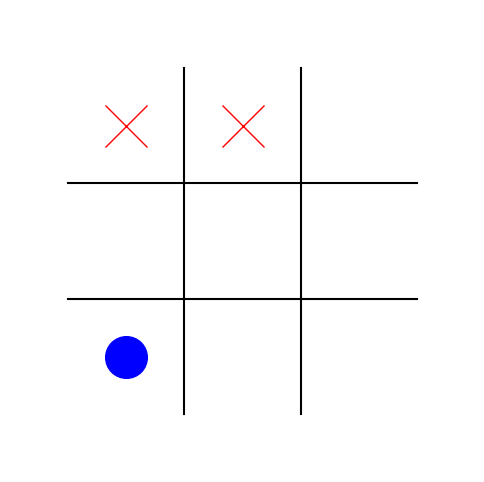

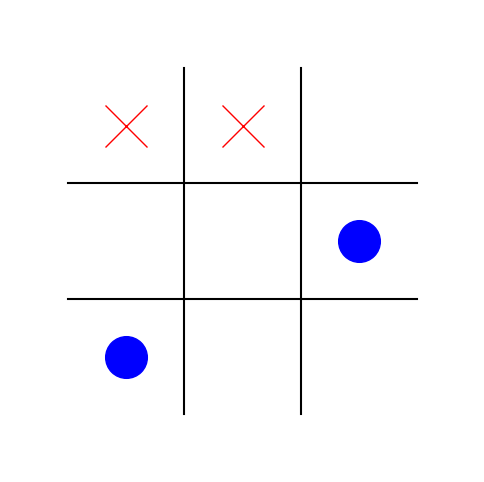

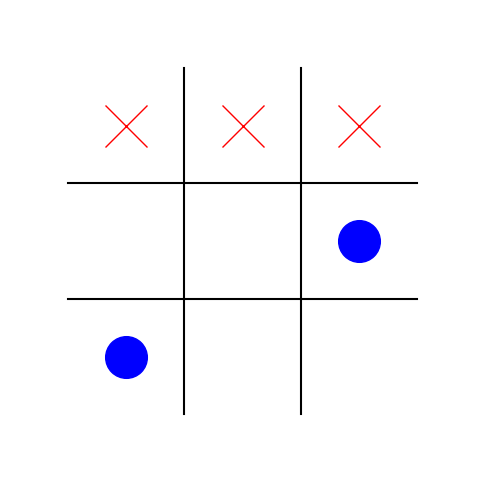

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Minimax function to evaluate board state
def minimax(board, depth, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move using Minimax
def find_best_move(board, player):
    best_move = None
    best_score = -float('inf') if player == 'X' else float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = player
                score = minimax(board, 0, player == 'O')
                board[i][j] = ' '
                if player == 'X':
                    if score > best_score:
                        best_score = score
                        best_move = (i, j)
                else:
                    if score < best_score:
                        best_score = score
                        best_move = (i, j)

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = find_best_move(board, current_player)
        else:
            moves = [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']
            move = moves[np.random.choice(len(moves))]  # Random move for 'O'

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **Explanation**
# **Plot Board Function:**

Visualizes the Tic-Tac-Toe board using matplotlib.
# **Check Win Function:**

Checks if a given player has won the game by evaluating all possible winning states.

Check Draw Function:

Checks if the board is full and no player has won, indicating a draw.
Minimax Function:

This is a recursive function that simulates all possible moves. It returns a score based on whether the board state is favorable or not.
Base Cases:
If the current board state is a win for 'X', it returns 10 - depth.
If the current board state is a win for 'O', it returns depth - 10.
If the board is a draw, it returns 0.
Recursive Case:
If it is the maximizing player's turn ('X'), it looks for the move that maximizes the score.
If it is the minimizing player's turn ('O'), it looks for the move that minimizes the score.
Find Best Move Function:

Uses the Minimax function to find the best move for the current player.
It evaluates each possible move and selects the move with the highest (for 'X') or lowest (for 'O') score.


# **Play Game Function:**

Simulates a game of Tic-Tac-Toe where
# **'X' uses the Minimax algorithm and 'O' makes random moves.**
Visualizes each step of the game, showing how the board evolves based on the Minimax evaluations.
When you run the code, it will visualize each step of the Tic-Tac-Toe game, showing how the Minimax algorithm selects moves and how the game progresses. This demonstrates the use of the Minimax algorithm for decision-making in games.

# **Player O uses minimax here.**

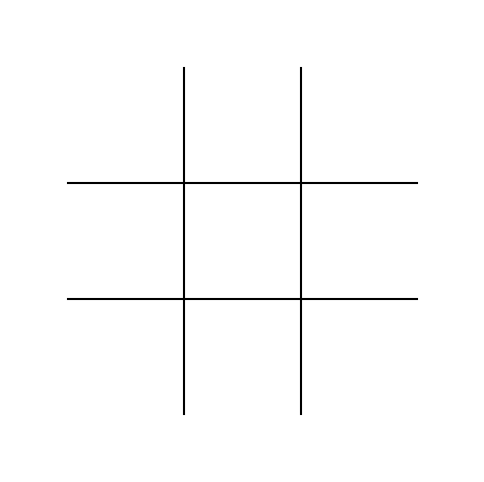

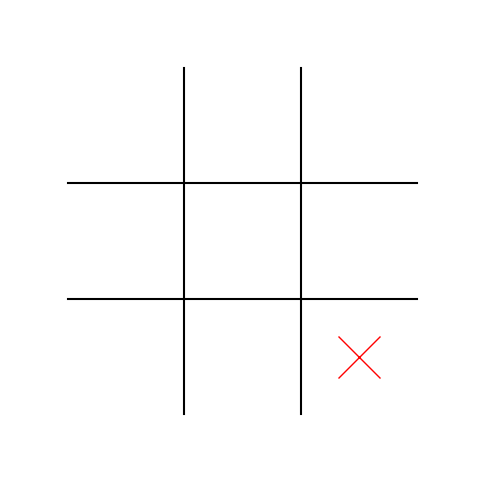

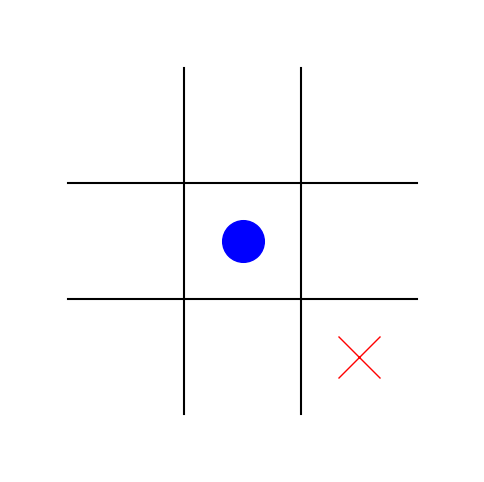

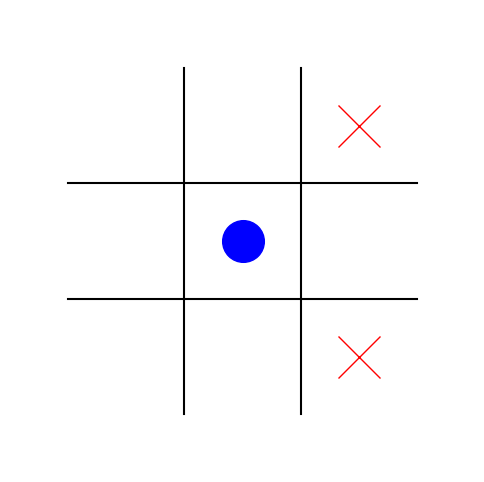

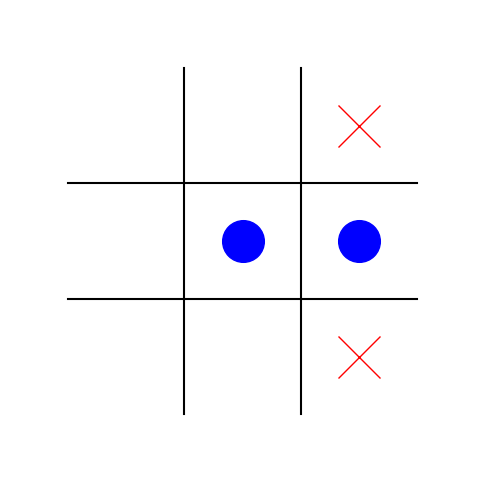

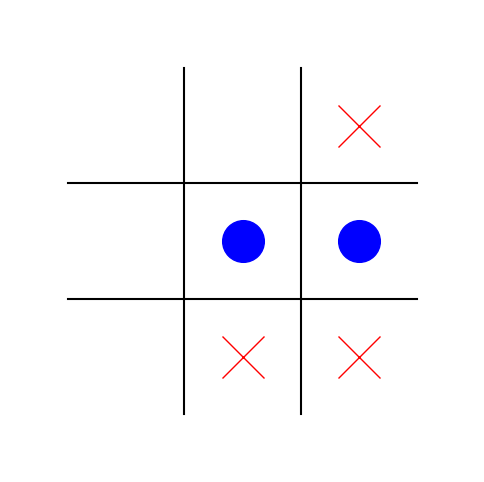

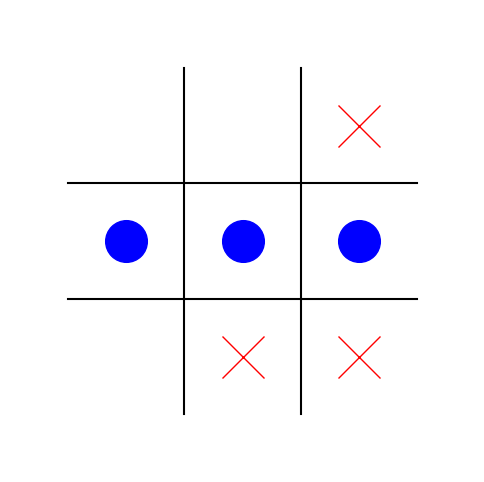

Player O wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Minimax function to evaluate board state
def minimax(board, depth, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move using Minimax
def find_best_move(board, player):
    best_move = None
    best_score = -float('inf') if player == 'X' else float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = player
                score = minimax(board, 0, player == 'O')
                board[i][j] = ' '
                if player == 'X':
                    if score > best_score:
                        best_score = score
                        best_move = (i, j)
                else:
                    if score < best_score:
                        best_score = score
                        best_move = (i, j)

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            moves = [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']
            move = moves[np.random.choice(len(moves))]  # Random move for 'X'
        else:
            move = find_best_move(board, current_player)  # Minimax move for 'O'

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# Implement the A* search algorithm for 'O'.
# Ensure 'X' uses the Minimax algorithm.

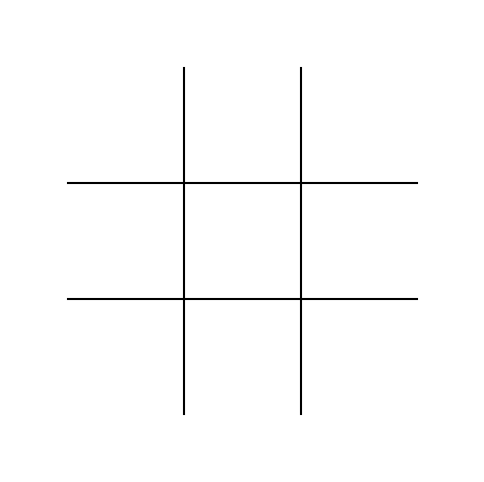

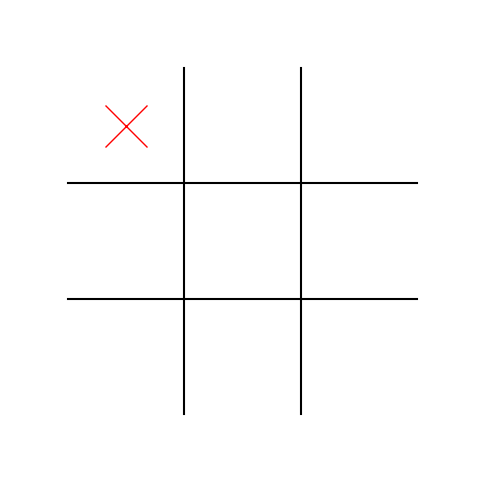

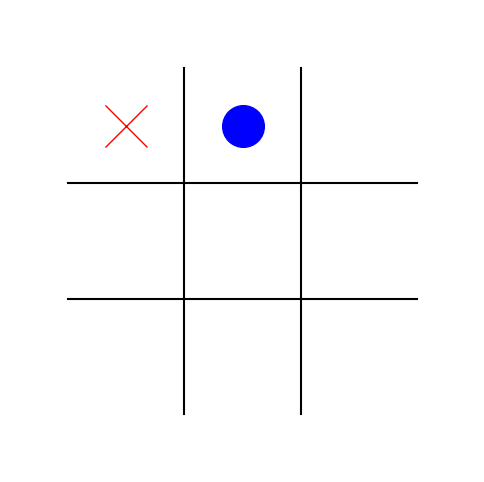

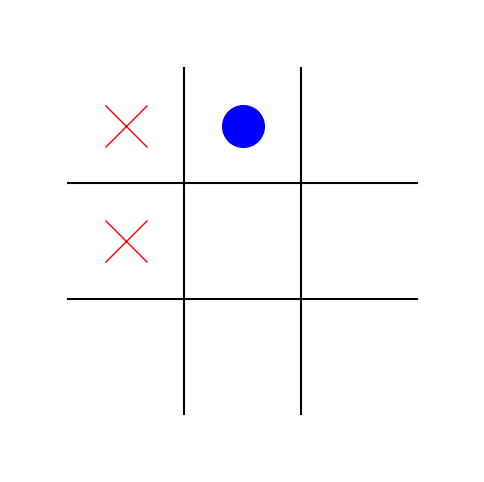

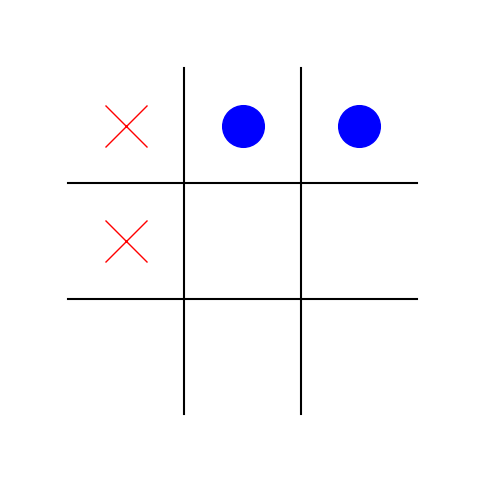

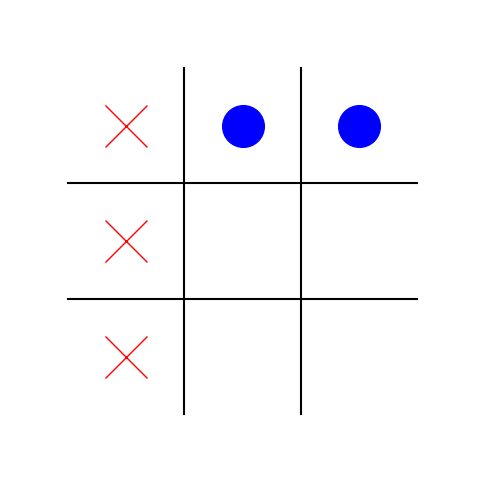

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Minimax function to evaluate board state
def minimax(board, depth, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move using Minimax
def find_best_move_minimax(board, player):
    best_move = None
    best_score = -float('inf') if player == 'X' else float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = player
                score = minimax(board, 0, player == 'O')
                board[i][j] = ' '
                if player == 'X':
                    if score > best_score:
                        best_score = score
                        best_move = (i, j)
                else:
                    if score < best_score:
                        best_score = score
                        best_move = (i, j)

    return best_move

# Heuristic function for A* search
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to find the best move using A* search
def a_star_search(board, player):
    moves = [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']
    best_move = None
    best_score = -float('inf') if player == 'X' else float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if player == 'X':
            if score > best_score:
                best_score = score
                best_move = move
        else:
            if score < best_score:
                best_score = score
                best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = find_best_move_minimax(board, current_player)  # Minimax move for 'X'
        else:
            move = a_star_search(board, current_player)  # A* move for 'O'

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


## **Alpha beta pruning on X move and For O its minimax Algorithm: **
Lets see the results:

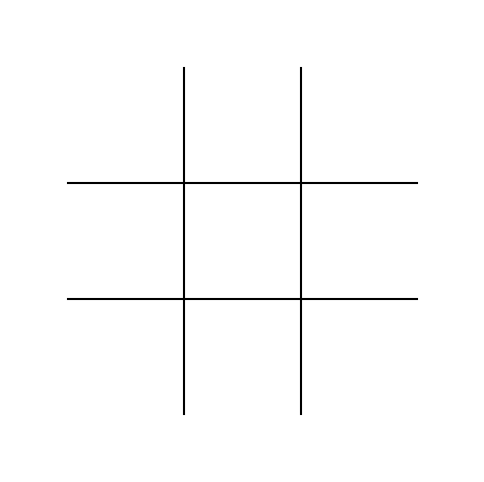

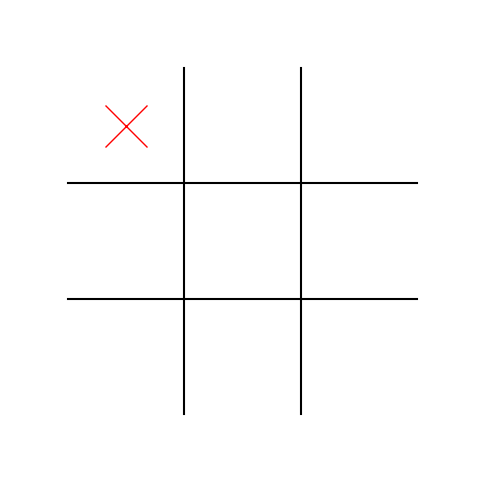

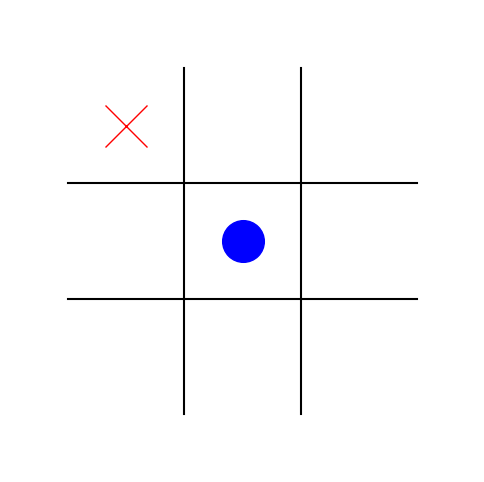

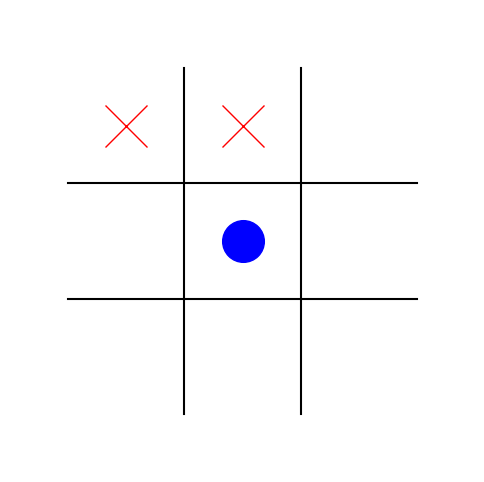

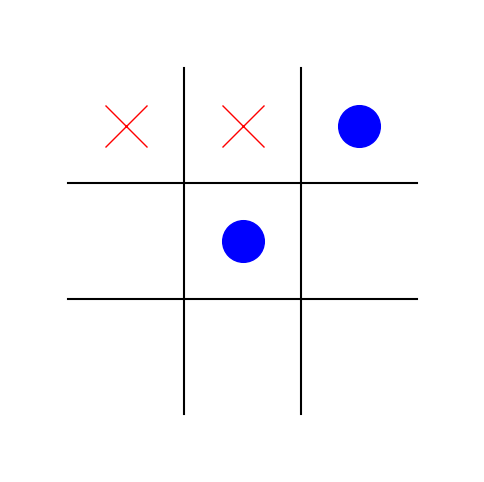

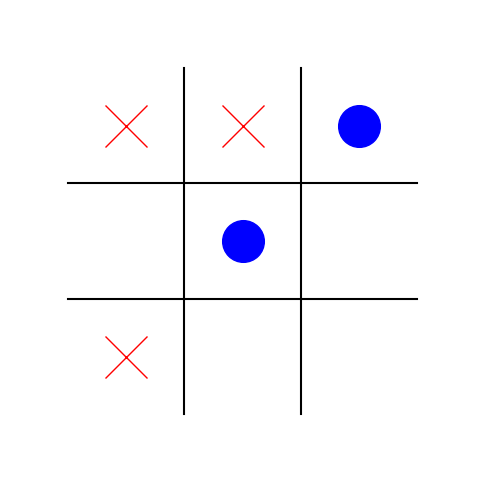

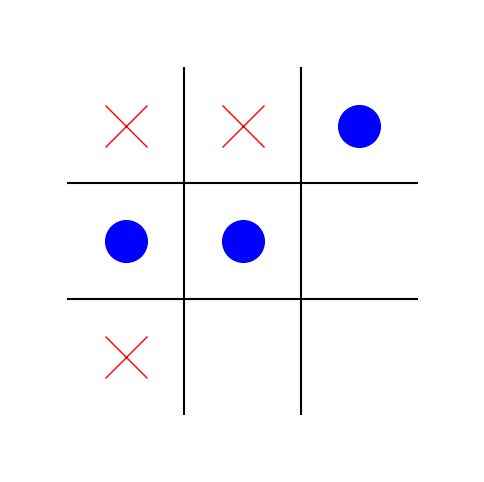

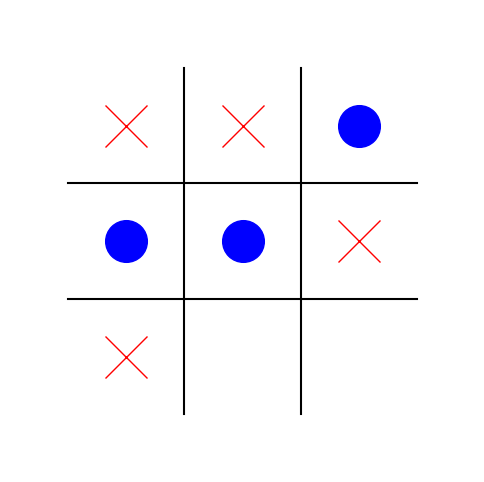

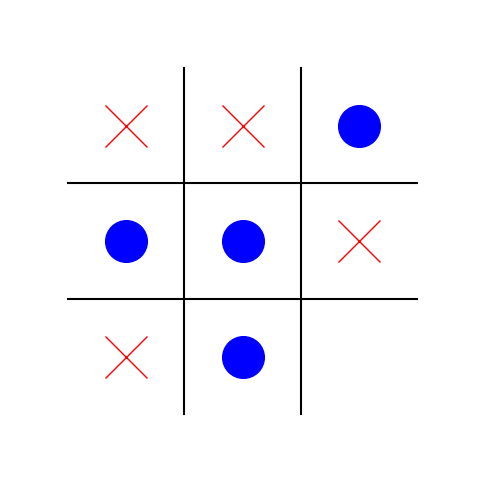

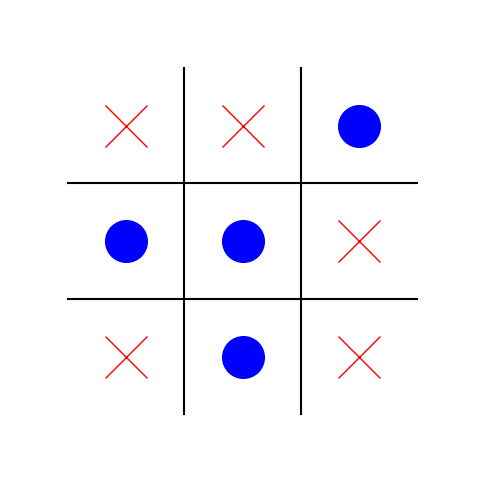

It's a draw!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Minimax function to evaluate board state
def minimax(board, depth, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Alpha-Beta Pruning for 'X' player
def alpha_beta_pruning(board, depth, alpha, beta, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
                    alpha = max(alpha, score)
                    if beta <= alpha:
                        break
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
                    beta = min(beta, score)
                    if beta <= alpha:
                        break
        return best_score

# Function to find the best move for 'X' using Alpha-Beta Pruning
def find_best_move_alpha_beta(board):
    best_move = None
    best_score = -float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'X'
                score = alpha_beta_pruning(board, 0, -float('inf'), float('inf'), False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Function to find the best move for 'O' using Minimax
def find_best_move_minimax(board):
    best_move = None
    best_score = float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                score = minimax(board, 0, True)
                board[i][j] = ' '
                if score < best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = find_best_move_alpha_beta(board)
        else:
            move = find_best_move_minimax(board)

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **X- move with Simulated Anealing and O move with Alpha-Beta Pruning**

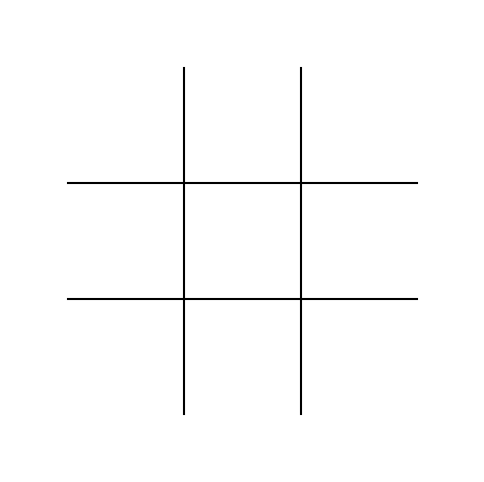

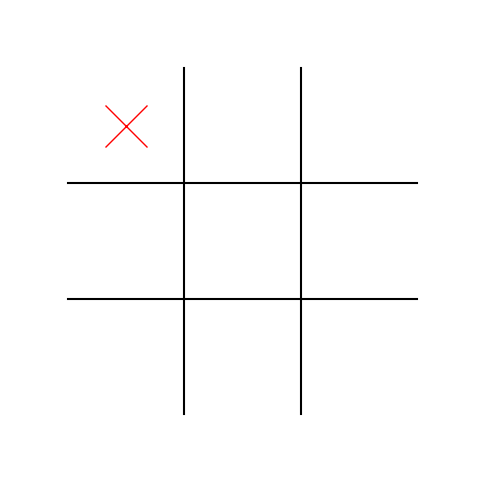

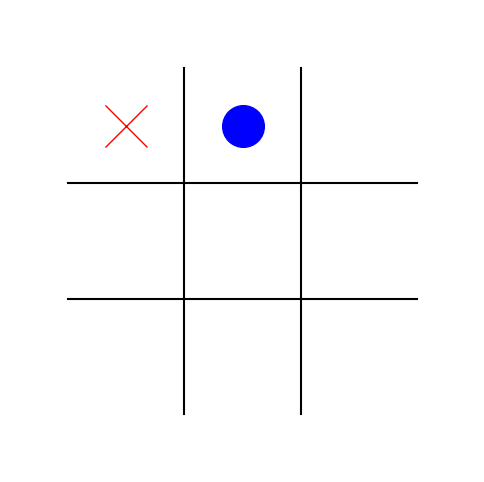

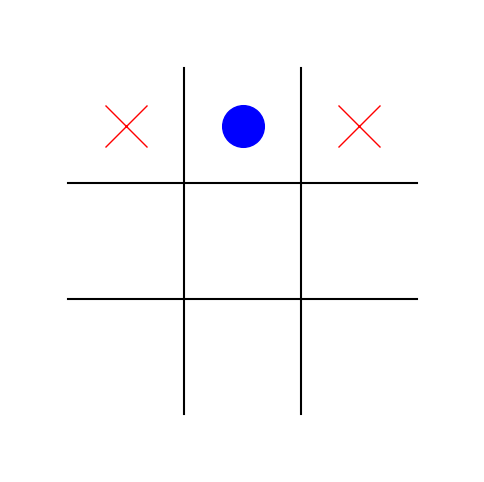

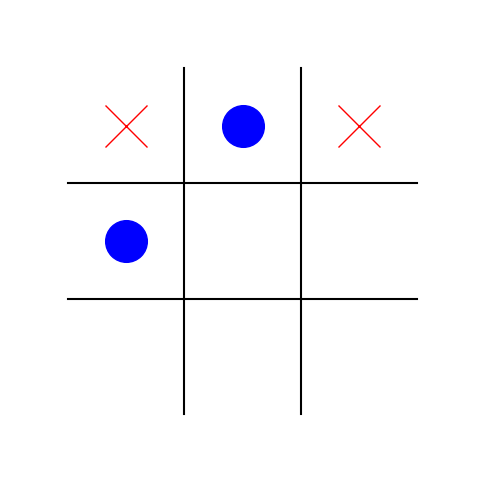

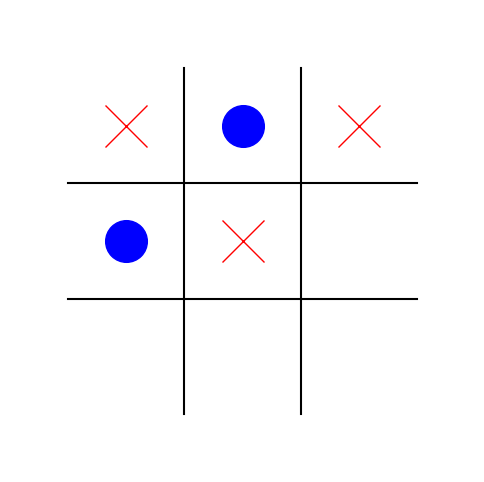

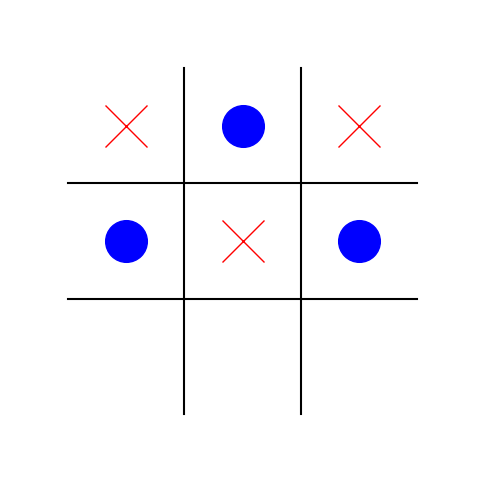

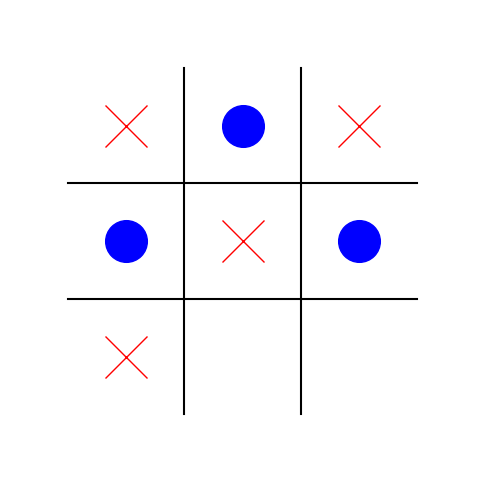

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Alpha-Beta Pruning for 'O' player
def alpha_beta_pruning(board, depth, alpha, beta, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
                    alpha = max(alpha, score)
                    if beta <= alpha:
                        break
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
                    beta = min(beta, score)
                    if beta <= alpha:
                        break
        return best_score

# Function to find the best move for 'O' using Alpha-Beta Pruning
def find_best_move_alpha_beta(board):
    best_move = None
    best_score = -float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                score = alpha_beta_pruning(board, 0, -float('inf'), float('inf'), False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Simulated Annealing algorithm for 'X' player
def simulated_annealing(board, initial_temp, final_temp, alpha):
    current_state = [row[:] for row in board]
    current_temp = initial_temp

    def random_move(state):
        empty_cells = [(i, j) for i in range(3) for j in range(3) if state[i][j] == ' ']
        return random.choice(empty_cells) if empty_cells else None

    def energy(state):
        if check_win(state, 'X'):
            return -1
        elif check_win(state, 'O'):
            return 1
        else:
            return 0

    while current_temp > final_temp:
        current_energy = energy(current_state)
        move = random_move(current_state)
        if move is None:
            break
        next_state = [row[:] for row in current_state]
        next_state[move[0]][move[1]] = 'X'
        next_energy = energy(next_state)

        delta_energy = next_energy - current_energy

        if delta_energy < 0 or random.uniform(0, 1) < math.exp(-delta_energy / current_temp):
            current_state = next_state

        current_temp *= alpha

    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] != current_state[i][j]:
                best_move = (i, j)
                break
        if best_move:
            break
    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = simulated_annealing(board, initial_temp=1000, final_temp=1, alpha=0.99)
        else:
            move = find_best_move_alpha_beta(board)

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


## **alpha_beta_pruning is used by player 'X' to find the best move.**
## **simulated_annealing is used by player 'O' to find the best move.**
The play_game function orchestrates the game, switching between 'X' and 'O' moves and visualizing the board after each move.

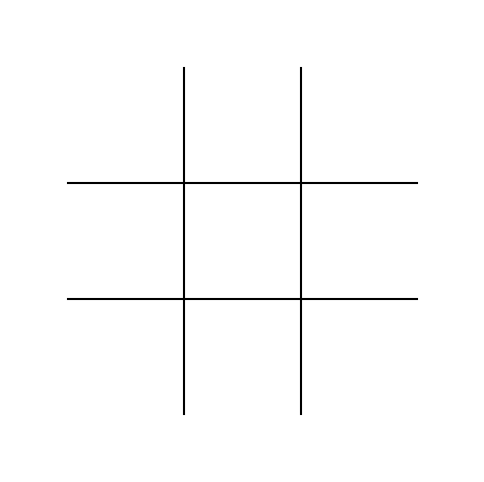

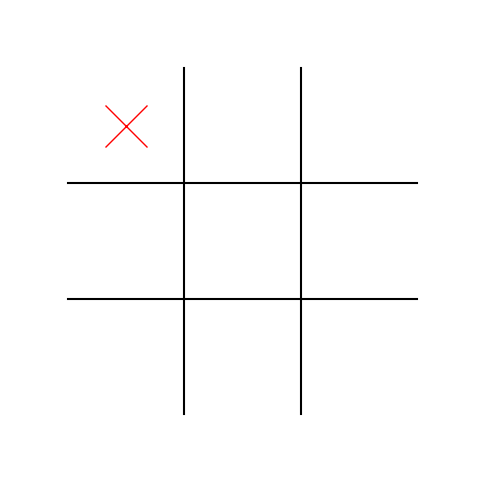

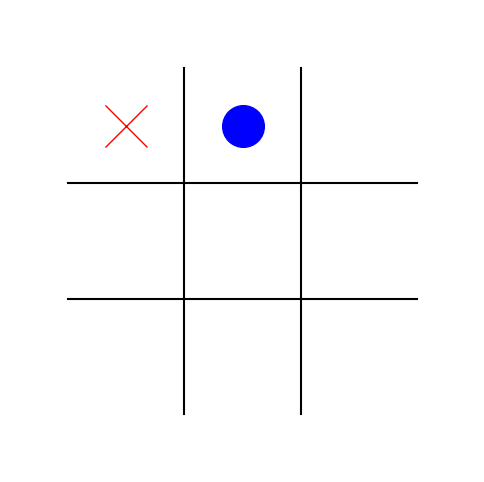

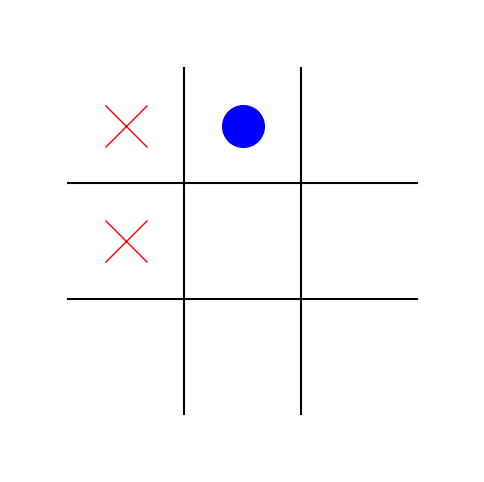

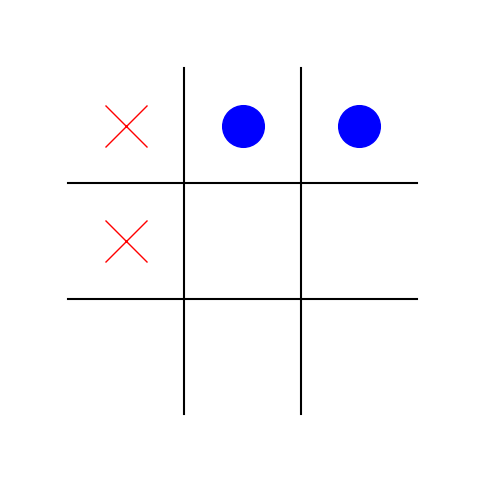

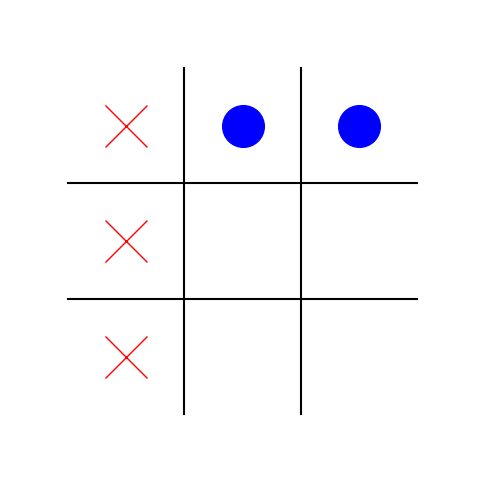

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Alpha-Beta Pruning for 'X' player
def alpha_beta_pruning(board, depth, alpha, beta, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
                    alpha = max(alpha, score)
                    if beta <= alpha:
                        break
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
                    beta = min(beta, score)
                    if beta <= alpha:
                        break
        return best_score

# Function to find the best move for 'X' using Alpha-Beta Pruning
def find_best_move_alpha_beta(board):
    best_move = None
    best_score = -float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'X'
                score = alpha_beta_pruning(board, 0, -float('inf'), float('inf'), False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Simulated Annealing algorithm for 'O' player
def simulated_annealing(board, initial_temp, final_temp, alpha):
    current_state = [row[:] for row in board]
    current_temp = initial_temp

    def random_move(state):
        empty_cells = [(i, j) for i in range(3) for j in range(3) if state[i][j] == ' ']
        return random.choice(empty_cells) if empty_cells else None

    def energy(state):
        if check_win(state, 'O'):
            return -1
        elif check_win(state, 'X'):
            return 1
        else:
            return 0

    while current_temp > final_temp:
        current_energy = energy(current_state)
        move = random_move(current_state)
        if move is None:
            break
        next_state = [row[:] for row in current_state]
        next_state[move[0]][move[1]] = 'O'
        next_energy = energy(next_state)

        delta_energy = next_energy - current_energy

        if delta_energy < 0 or random.uniform(0, 1) < math.exp(-delta_energy / current_temp):
            current_state = next_state

        current_temp *= alpha

    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] != current_state[i][j]:
                best_move = (i, j)
                break
        if best_move:
            break
    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = find_best_move_alpha_beta(board)
        else:
            move = simulated_annealing(board, initial_temp=1000, final_temp=1, alpha=0.99)

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


**Simulated annealing  on X moves and Alpha beta prunning on O moves.**

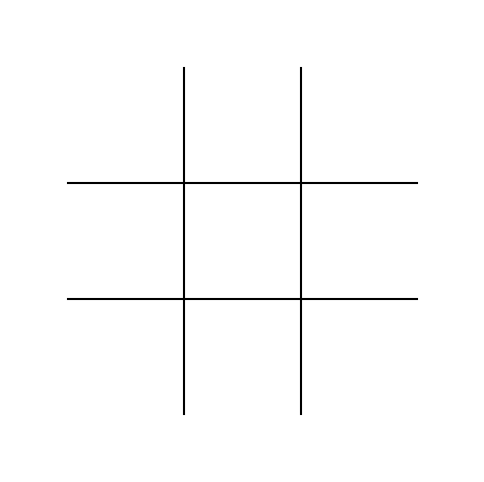

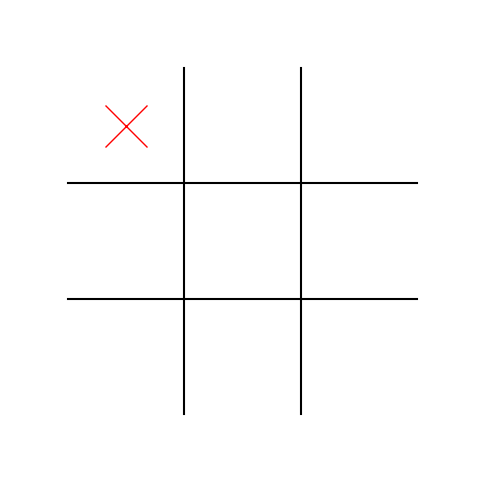

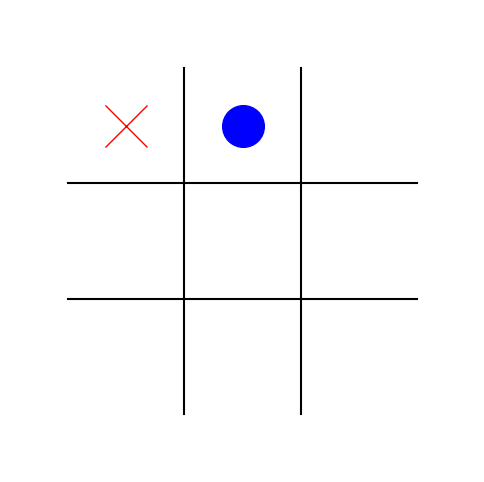

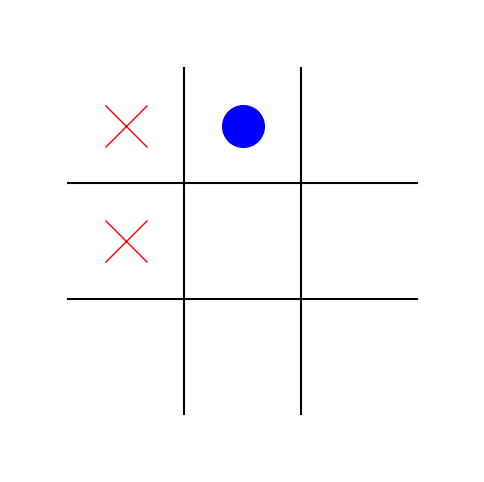

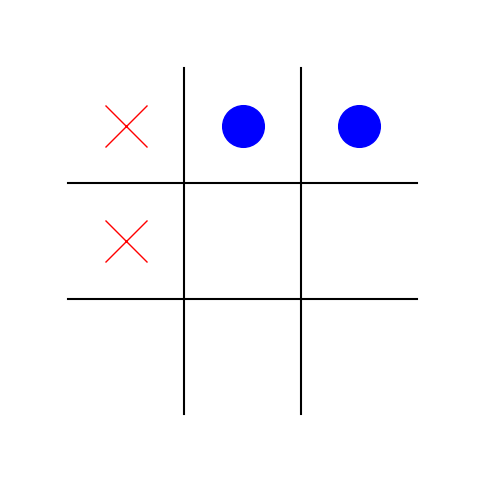

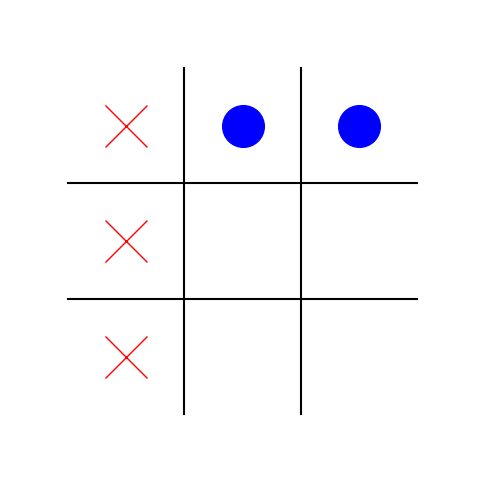

Player X wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math


# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Alpha-Beta Pruning for 'X' player
def alpha_beta_pruning(board, depth, alpha, beta, is_maximizing):
    if check_win(board, 'X'):
        return 10 - depth
    if check_win(board, 'O'):
        return depth - 10
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
                    alpha = max(alpha, score)
                    if beta <= alpha:
                        break
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = alpha_beta_pruning(board, depth + 1, alpha, beta, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
                    beta = min(beta, score)
                    if beta <= alpha:
                        break
        return best_score

# Function to find the best move for 'X' using Alpha-Beta Pruning
def find_best_move_alpha_beta(board):
    best_move = None
    best_score = -float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'X'
                score = alpha_beta_pruning(board, 0, -float('inf'), float('inf'), False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Simulated Annealing algorithm for 'O' player
def simulated_annealing(board, initial_temp, final_temp, alpha):
    current_state = [row[:] for row in board]
    current_temp = initial_temp

    def random_move(state):
        empty_cells = [(i, j) for i in range(3) for j in range(3) if state[i][j] == ' ']
        return random.choice(empty_cells) if empty_cells else None

    def energy(state):
        if check_win(state, 'O'):
            return 1
        elif check_win(state, 'X'):
            return -1
        else:
            return 0

    while current_temp > final_temp:
        current_energy = energy(current_state)
        move = random_move(current_state)
        if move is None:
            break
        next_state = [row[:] for row in current_state]
        next_state[move[0]][move[1]] = 'O'
        next_energy = energy(next_state)

        delta_energy = next_energy - current_energy

        if delta_energy > 0 or random.uniform(0, 1) < math.exp(delta_energy / current_temp):
            current_state = next_state

        current_temp *= alpha

    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] != current_state[i][j]:
                best_move = (i, j)
                break
        if best_move:
            break
    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = find_best_move_alpha_beta(board)
        else:
            move = simulated_annealing(board, initial_temp=1000, final_temp=1, alpha=0.99)

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


### **'X' player's moves are determined by the Simulated Annealing algorithm.**

### **'O' player's moves are determined by the Minimax algorithm.**

### **The game is played out until one player wins or it ends in a draw.**

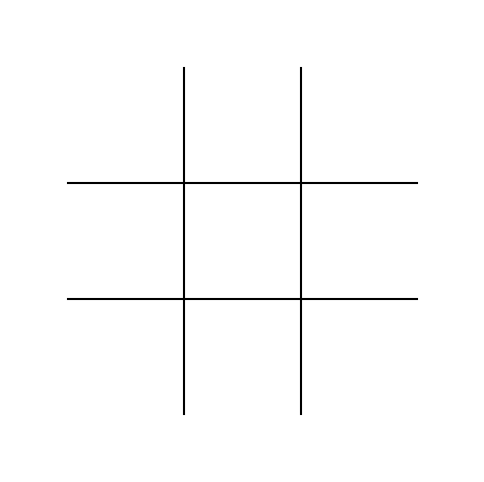

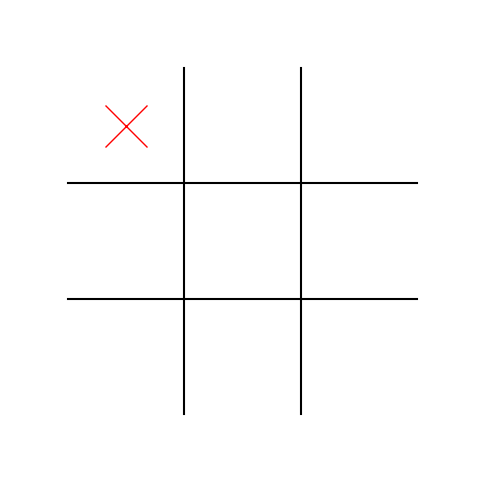

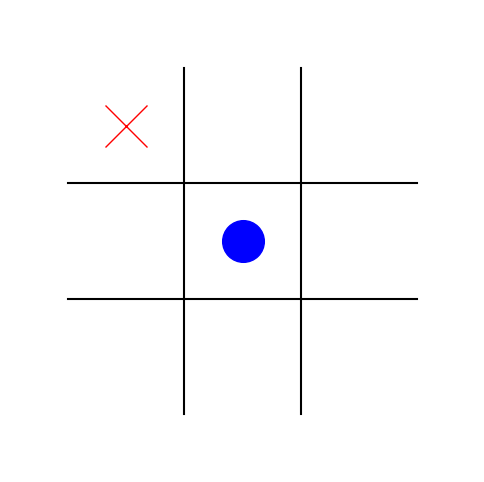

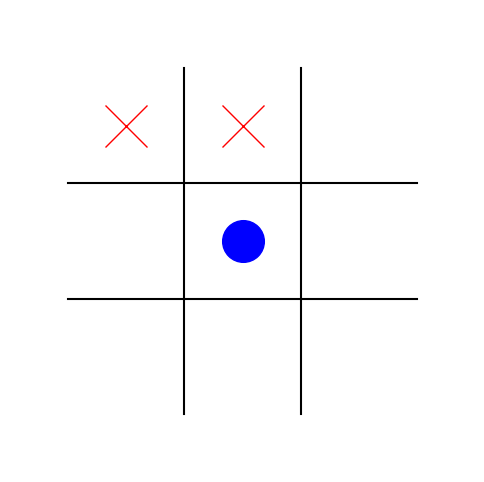

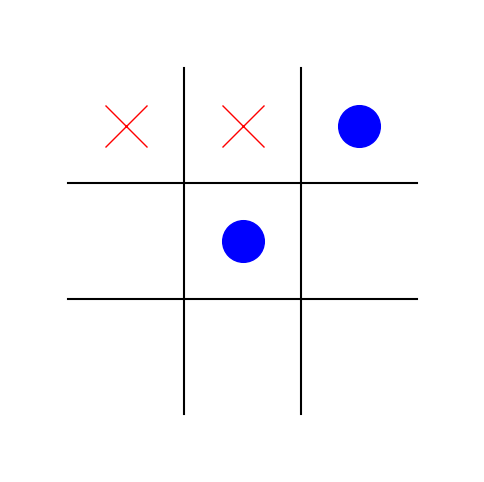

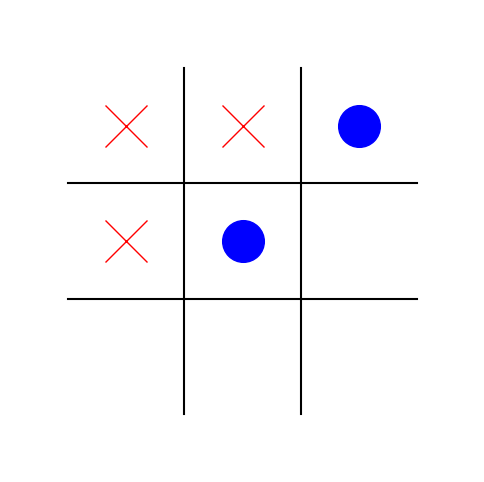

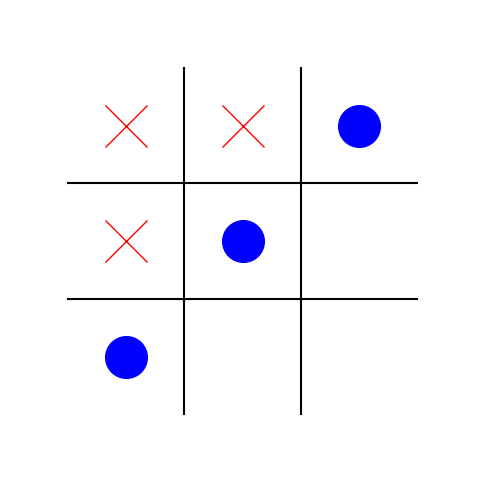

Player O wins!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for a draw
def check_draw(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# Simulated Annealing for 'X' player
def simulated_annealing(board, initial_temp, final_temp, alpha):
    current_state = [row[:] for row in board]
    current_temp = initial_temp

    def random_move(state):
        empty_cells = [(i, j) for i in range(3) for j in range(3) if state[i][j] == ' ']
        return random.choice(empty_cells) if empty_cells else None

    def energy(state):
        if check_win(state, 'X'):
            return -1
        elif check_win(state, 'O'):
            return 1
        else:
            return 0

    while current_temp > final_temp:
        current_energy = energy(current_state)
        move = random_move(current_state)
        if move is None:
            break
        next_state = [row[:] for row in current_state]
        next_state[move[0]][move[1]] = 'X'
        next_energy = energy(next_state)

        delta_energy = next_energy - current_energy

        if delta_energy < 0 or random.uniform(0, 1) < math.exp(-delta_energy / current_temp):
            current_state = next_state

        current_temp *= alpha

    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] != current_state[i][j]:
                best_move = (i, j)
                break
        if best_move:
            break
    return best_move

# Minimax algorithm for 'O' player
def minimax(board, depth, is_maximizing):
    if check_win(board, 'X'):
        return -1
    if check_win(board, 'O'):
        return 1
    if check_draw(board):
        return 0

    if is_maximizing:
        best_score = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    score = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    best_score = max(score, best_score)
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    score = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    best_score = min(score, best_score)
        return best_score

# Function to find the best move for 'O' using Minimax
def find_best_move_minimax(board):
    best_move = None
    best_score = -float('inf')

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                score = minimax(board, 0, False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = simulated_annealing(board, initial_temp=1000, final_temp=1, alpha=0.99)
        else:
            move = find_best_move_minimax(board)

        if move is not None:
            board[move[0]][move[1]] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **X moves on Greedy best Depth search and O moves with Constraint Satisfaction Problems (CSPs)**

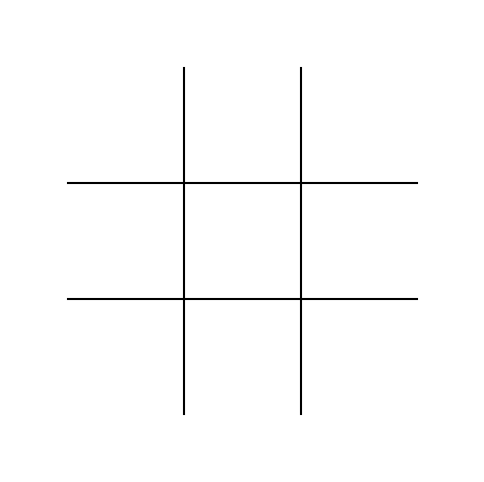

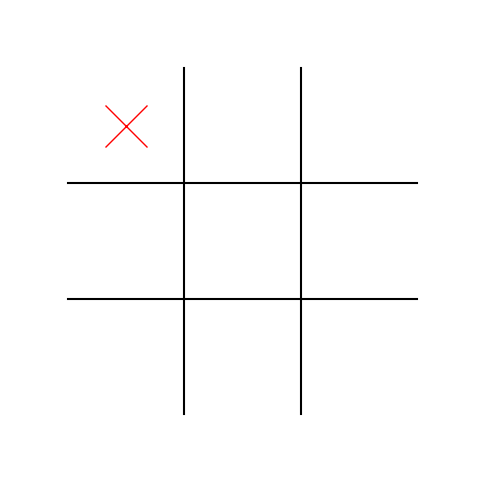

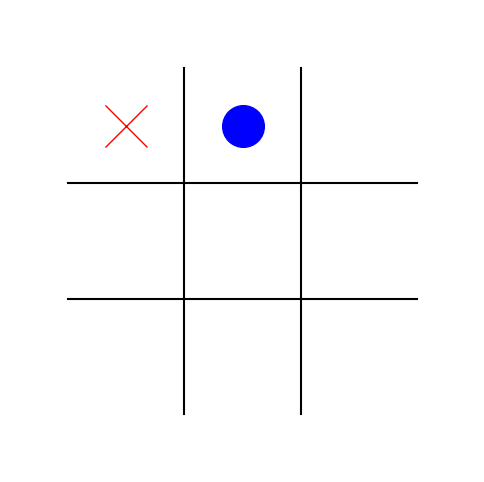

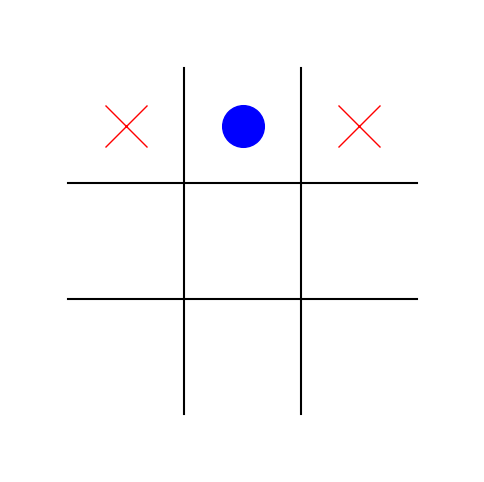

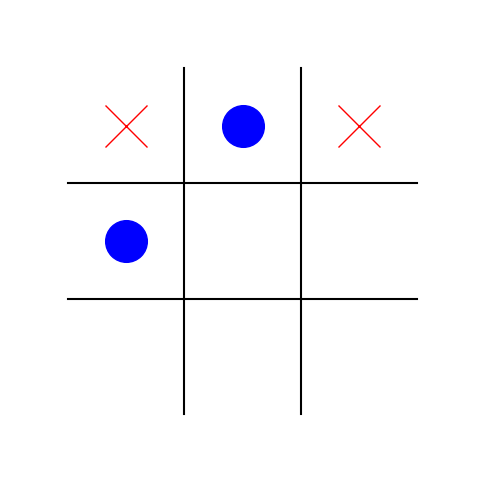

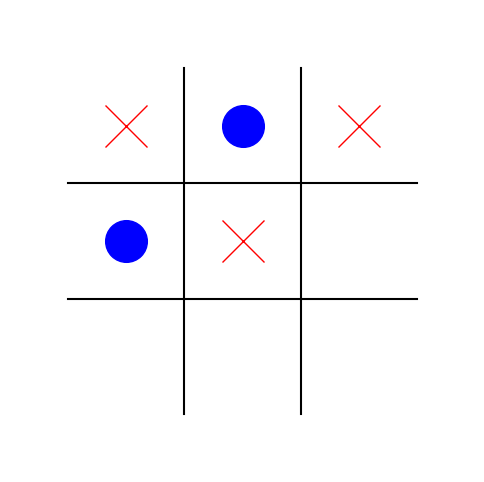

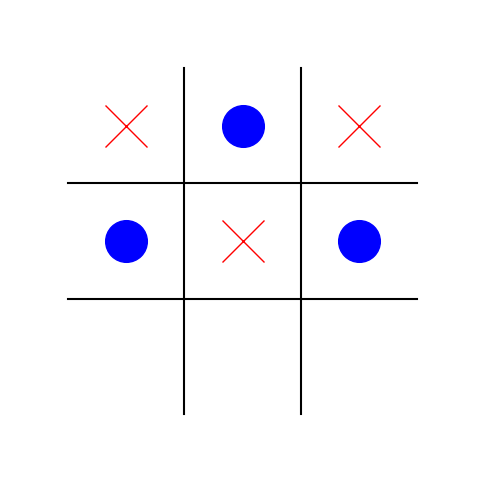

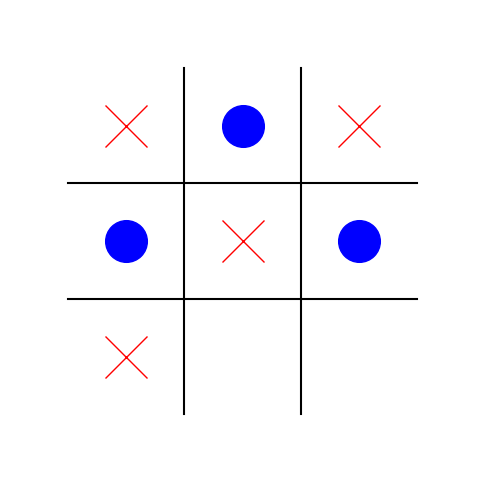

Player X wins!


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to perform Constraint Satisfaction Problem (CSP) Search
def csp_search(board, player):
    def is_valid(board, move, player):
        i, j = move
        board[i][j] = player
        valid = not check_win(board, player)
        board[i][j] = ' '
        return valid

    moves = available_moves(board)
    for move in moves:
        if is_valid(board, move, player):
            return move
    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = greedy_best_first_search(board, current_player)
        else:
            move = csp_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


'X' uses Constraint Satisfaction Problem (CSP) for making its moves and 'O' uses Greedy Best First Search (GBFS)

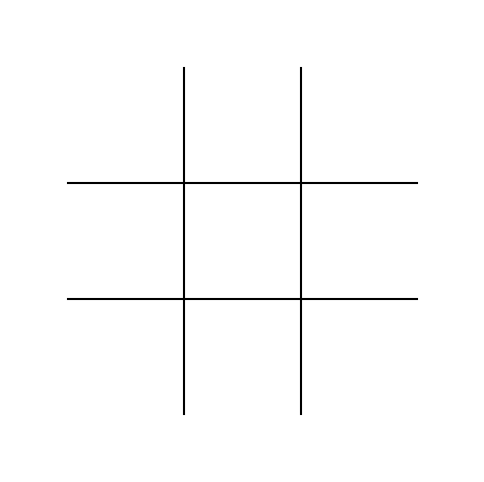

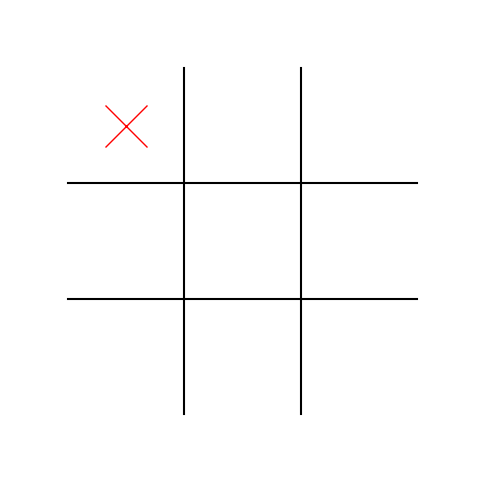

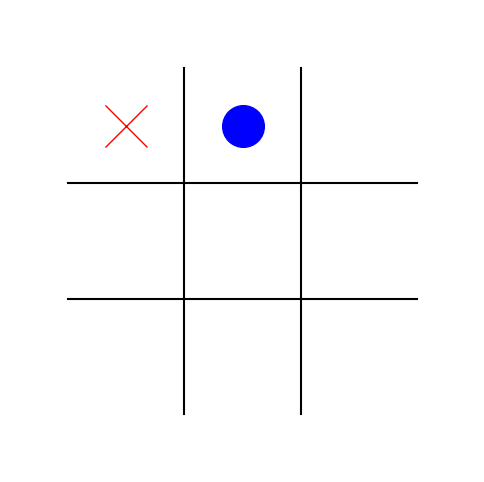

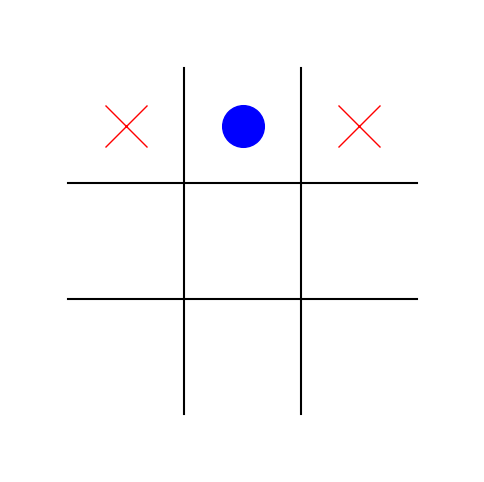

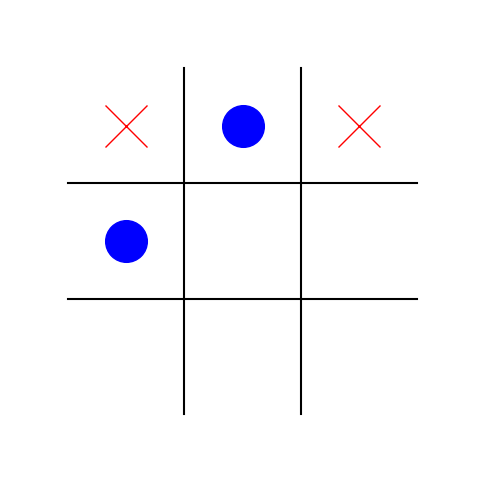

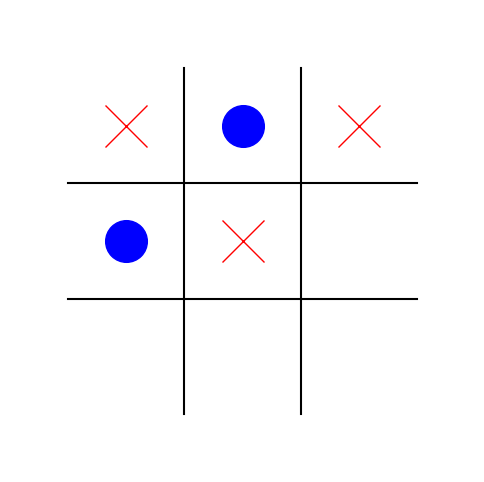

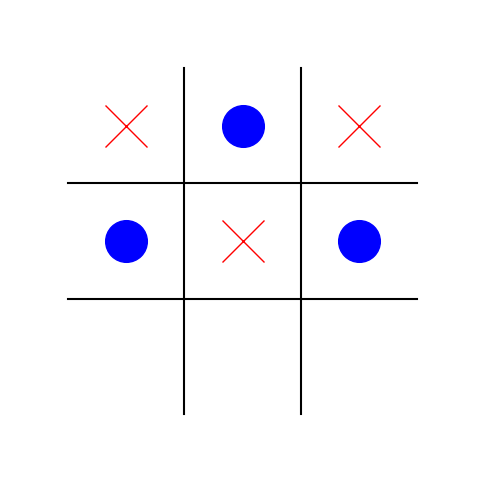

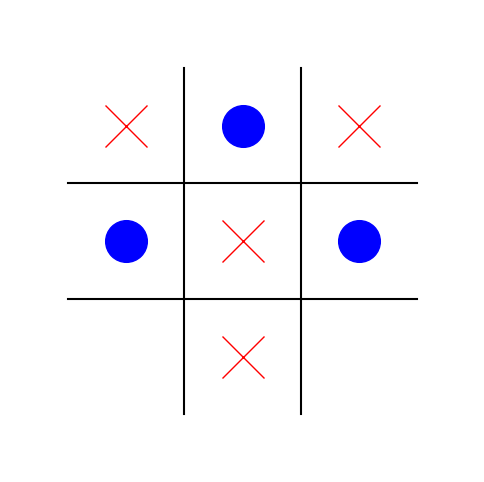

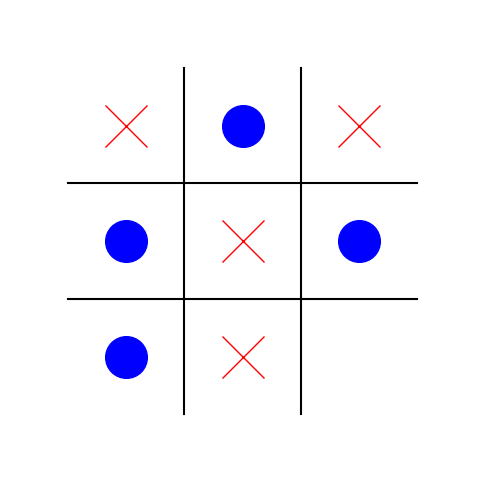

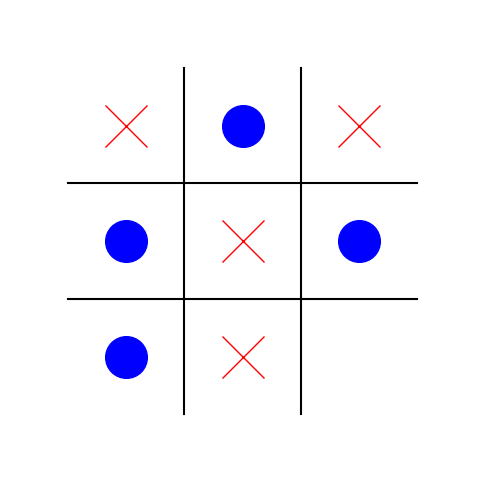

It's a draw!


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Heuristic function to evaluate board state
def heuristic(board, player):
    if check_win(board, player):
        return 10
    if check_win(board, 'X' if player == 'O' else 'O'):
        return -10
    return 0

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Constraint Satisfaction Problem (CSP) Search
def csp_search(board, player):
    def is_valid(board, move, player):
        i, j = move
        board[i][j] = player
        valid = not check_win(board, player)
        board[i][j] = ' '
        return valid

    moves = available_moves(board)
    for move in moves:
        if is_valid(board, move, player):
            return move
    return None

# Function to perform Greedy Best First Search (GBFS)
def greedy_best_first_search(board, player):
    moves = available_moves(board)
    best_move = None
    best_score = -float('inf')

    for move in moves:
        i, j = move
        board[i][j] = player
        score = heuristic(board, player)
        board[i][j] = ' '

        if score > best_score:
            best_score = score
            best_move = move

    return best_move

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = csp_search(board, current_player)
        else:
            move = greedy_best_first_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **'X' moves with Constraint Satisfaction Problem (CSP) and 'O' moves with MiniMax algorithm**

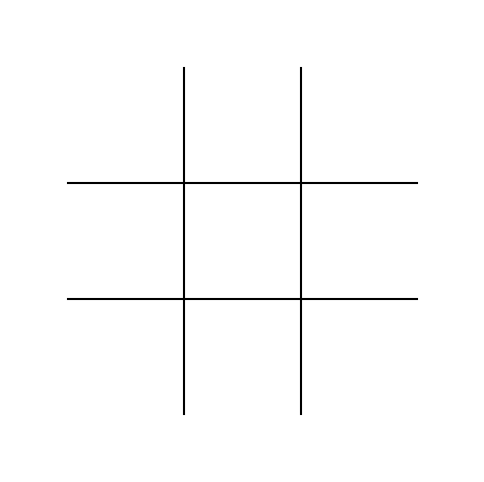

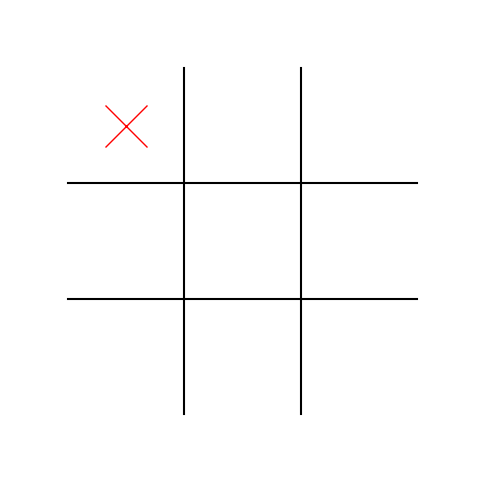

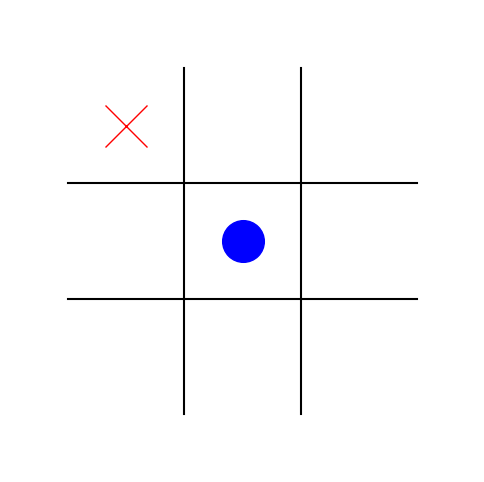

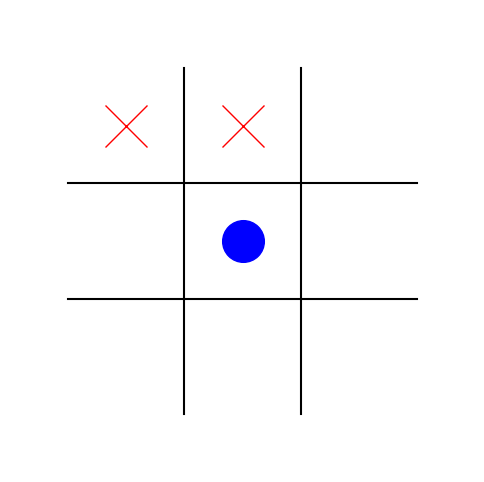

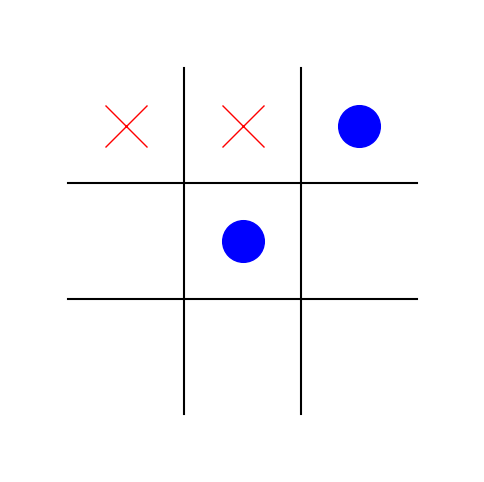

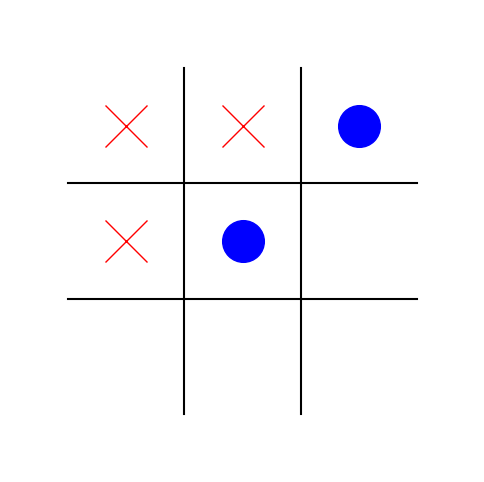

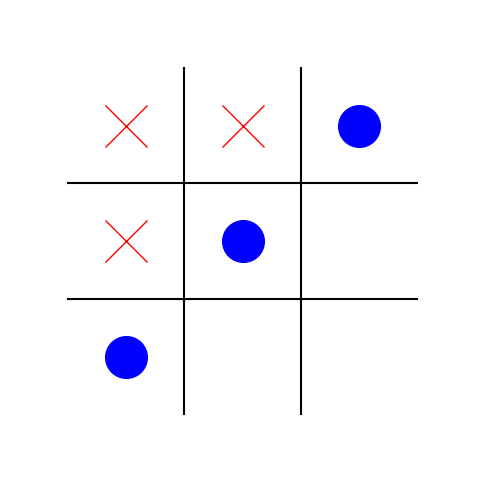

Player O wins!


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform MiniMax algorithm
def minimax(board, depth, maximizing_player):
    if check_win(board, 'O'):
        return 1
    elif check_win(board, 'X'):
        return -1
    elif len(available_moves(board)) == 0:
        return 0

    if maximizing_player:
        max_eval = -float('inf')
        for move in available_moves(board):
            i, j = move
            board[i][j] = 'O'
            eval = minimax(board, depth + 1, False)
            board[i][j] = ' '
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for move in available_moves(board):
            i, j = move
            board[i][j] = 'X'
            eval = minimax(board, depth + 1, True)
            board[i][j] = ' '
            min_eval = min(min_eval, eval)
        return min_eval

# Function to perform Constraint Satisfaction Problem (CSP) Search
def csp_search(board, player):
    def is_valid(board, move, player):
        i, j = move
        board[i][j] = player
        valid = not check_win(board, player)
        board[i][j] = ' '
        return valid

    moves = available_moves(board)
    for move in moves:
        if is_valid(board, move, player):
            return move
    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            move = csp_search(board, current_player)
        else:
            best_score = -float('inf')
            best_move = None
            for move in available_moves(board):
                i, j = move
                board[i][j] = 'O'
                score = minimax(board, 0, False)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = move
            move = best_move

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()


# **'X' uses Alpha-Beta Pruning and 'O' uses Constraint Satisfaction Problem (CSP) for making their moves.**

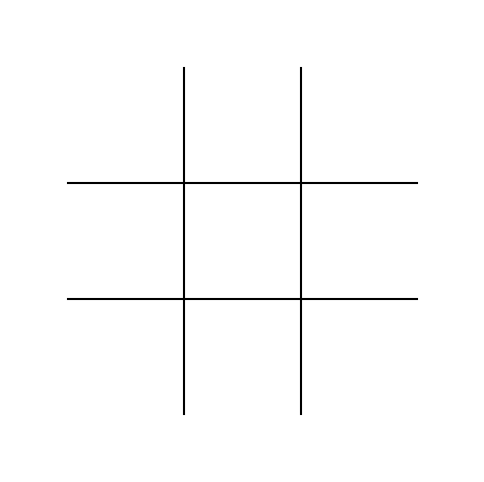

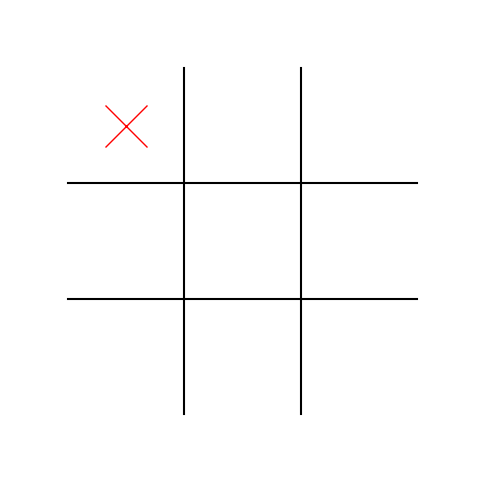

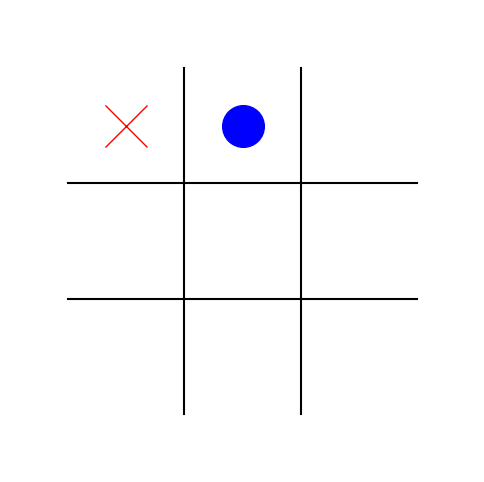

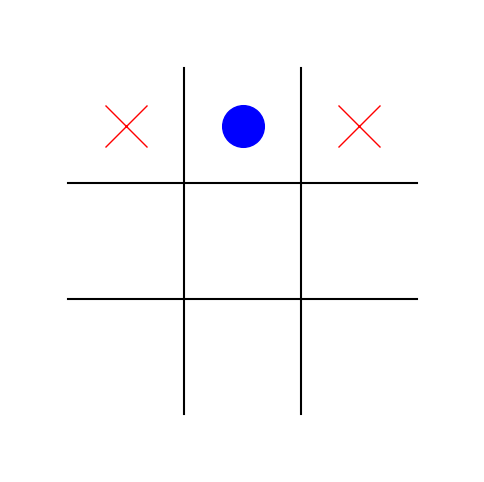

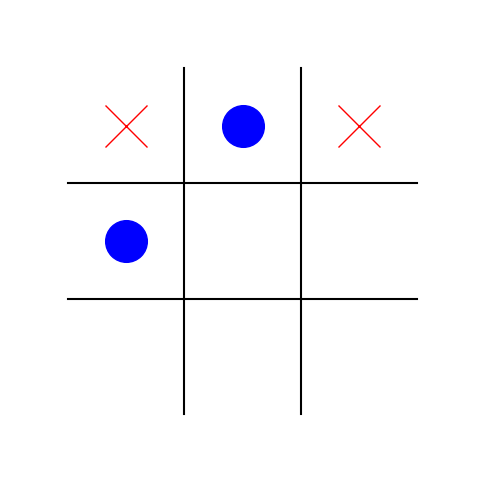

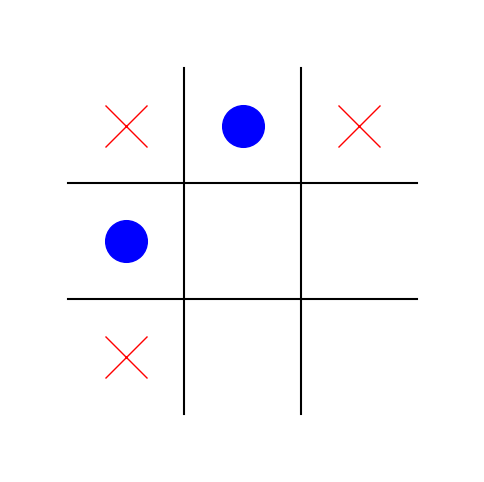

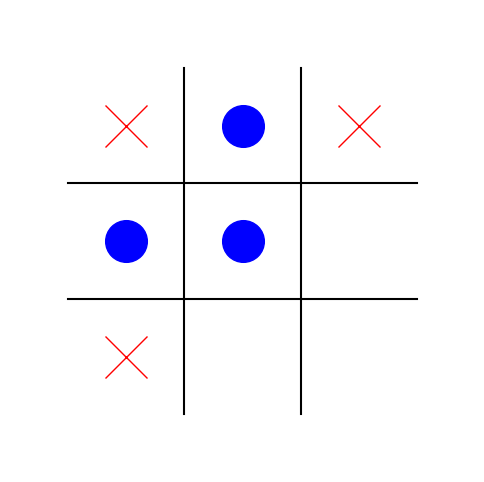

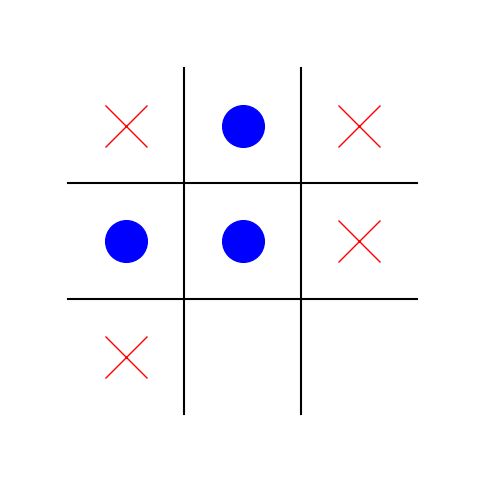

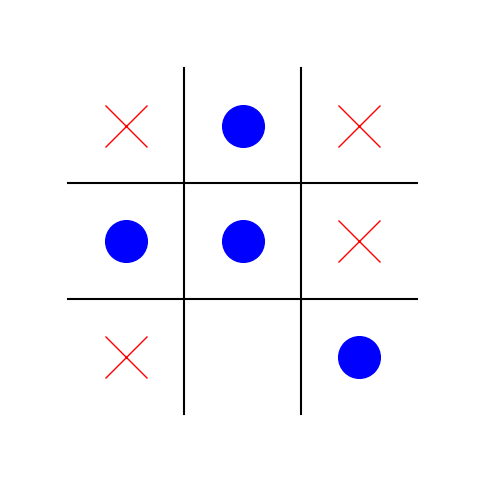

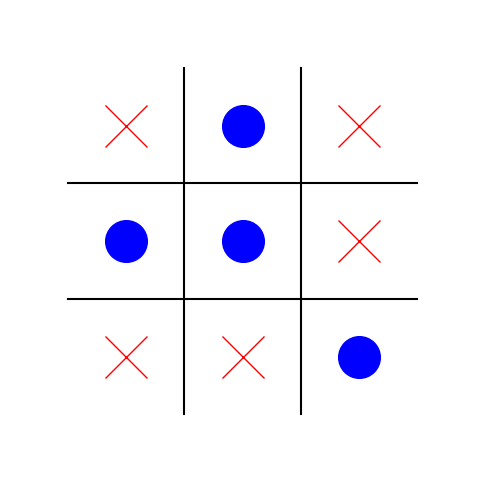

It's a draw!


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the board
def plot_board(board):
    plt.figure(figsize=(6, 6))
    plt.plot([1, 1], [0, 3], 'k-')
    plt.plot([2, 2], [0, 3], 'k-')
    plt.plot([0, 3], [1, 1], 'k-')
    plt.plot([0, 3], [2, 2], 'k-')

    for i in range(3):
        for j in range(3):
            if board[i][j] == 'X':
                plt.plot(j + 0.5, 2.5 - i, 'rx', markersize=30)
            elif board[i][j] == 'O':
                plt.plot(j + 0.5, 2.5 - i, 'bo', markersize=30)

    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.axis('off')
    plt.show()

# Function to check for a win
def check_win(board, player):
    win_states = [
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for win_state in win_states:
        if all(board[x][y] == player for x, y in win_state):
            return True
    return False

# Function to check for available moves
def available_moves(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']

# Function to perform Alpha-Beta Pruning
def alpha_beta_pruning(board, depth, alpha, beta, maximizing_player):
    if check_win(board, 'O'):
        return 1
    elif check_win(board, 'X'):
        return -1
    elif len(available_moves(board)) == 0:
        return 0

    if maximizing_player:
        max_eval = -float('inf')
        for move in available_moves(board):
            i, j = move
            board[i][j] = 'O'
            eval = alpha_beta_pruning(board, depth + 1, alpha, beta, False)
            board[i][j] = ' '
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for move in available_moves(board):
            i, j = move
            board[i][j] = 'X'
            eval = alpha_beta_pruning(board, depth + 1, alpha, beta, True)
            board[i][j] = ' '
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

# Function to perform Constraint Satisfaction Problem (CSP) Search
def csp_search(board, player):
    def is_valid(board, move, player):
        i, j = move
        board[i][j] = player
        valid = not check_win(board, player)
        board[i][j] = ' '
        return valid

    moves = available_moves(board)
    for move in moves:
        if is_valid(board, move, player):
            return move
    return None

# Function to play a game of Tic-Tac-Toe
def play_game():
    board = [[' ' for _ in range(3)] for _ in range(3)]
    current_player = 'X'

    for _ in range(9):
        plot_board(board)
        if current_player == 'X':
            best_score = -float('inf')
            best_move = None
            for move in available_moves(board):
                i, j = move
                board[i][j] = 'X'
                score = alpha_beta_pruning(board, 0, -float('inf'), float('inf'), True)
                board[i][j] = ' '
                if score > best_score:
                    best_score = score
                    best_move = move
            move = best_move
        else:
            move = csp_search(board, current_player)

        if move is None:
            break

        i, j = move
        board[i][j] = current_player

        if check_win(board, current_player):
            plot_board(board)
            print(f"Player {current_player} wins!")
            return

        current_player = 'O' if current_player == 'X' else 'X'

    plot_board(board)
    print("It's a draw!")

# Play the game
play_game()
